In [1]:
import os 

os.getcwd()

#os.listdir()
#os.listdir('Desktop')

import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Daten importieren

In [2]:
file_path = 'C:\\Users\\PC\\Desktop\\german_credit.csv'

# Datei öffnen
df_credit = pd.read_csv(file_path)

# Die ersten Zeilen der Datei anzeigen
pd.set_option('display.max_columns', None)


df_credit.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


# Auf fehlende Werte prüfen -- Keine fehlenden Werte gefunden


In [3]:
df_credit.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

# Datentypen anpassen


In [4]:

# Liste der Spalten, die in int umgewandelt werden sollen
int_cols = ['Creditability', 'Duration of Credit (month)', 'Age (years)', 'Credit Amount']

# Liste der Spalten, die in Kategorien umgewandelt werden sollen
cat_cols = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 
            'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
            'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits', 
            'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 
            'Telephone', 'Foreign Worker']

#  in int
for col in int_cols:
    df_credit[col] = df_credit[col].astype(int)

#  in Kategorie
for col in cat_cols:
    df_credit[col] = df_credit[col].astype('category')


In [5]:
df_credit.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

# Spaltenunterkategorien benennen

In [6]:
# Spaltenunterkategorien benennen


columns_2 = ['Account Balance', 'Payment Status of Previous Credit', 
           'Purpose', 'Credit Amount Group', 'Value Savings/Stocks', 'Length of current employment', 
           'Instalment per cent', 'Geschlecht', 'Guarantors', 
           'Duration in Current address', 'Most valuable available asset', 
           'Age Group', 'Concurrent Credits', 'Type of apartment', 
           'No of Credits at this Bank', 'Occupation', 'No of dependents', 
           'Telephone', 'Foreign Worker']
#Beschriftung 
df_credit=df_credit.replace({'Account Balance' : { 1 : 'No Account', 2 : 'None',3: 'Below 200 DM',4:'200 DM or Above'}})

 
df_credit=df_credit.replace({'Payment Status of Previous Credit' : {0:'Delayed',1 : 'Other Credits', 2 : 'Paid Up',
                                                          3: 'No Problem with Current Credits',4:'Previous Credits Paid'}})
#------------------------------
df_credit=df_credit.replace({'Value Savings/Stocks' : {1 : 'None', 2 : 'Below 100 DM',
                                                          3: '[100, 500)',4:'[500, 1000)',5:'Above 1000'}})
#-----------------------
df_credit=df_credit.replace({'Length of current employment' : {1 : 'Unemployed', 2 : '<1 Year',
                                                          3: '[1, 4)',4:'[4, 7)',5:'Above 7'}})
#---------------------
df_credit=df_credit.replace({'Instalment per cent' : {1 : 'Above 35%', 2 : '(25%, 35%)',
                                                          3: '[20%, 25%)',4:'Below 20%'}})
#---------------------------------
df_credit=df_credit.replace({'Occupation' : {1 : 'Unemployed, unskilled', 2 : 'Unskilled Permanent Resident',
                                                          3: 'Skilled',4:'Executive'}})
#----------------------------
df_credit=df_credit.replace({'Sex & Marital Status' : {1 : 'Male, Divorced', 2 : 'Male, Single',
                                                          3: 'Male, Married/Widowed',4:'Female'}})
#----------------------------------
df_credit=df_credit.replace({'Duration in Current address' : {1 : '<1 Year', 2 : '[1, 4)',
                                                          3: '[4, 7)',4:'Above 7'}})
#---------------------------------
df_credit=df_credit.replace({'Type of apartment' : {1 : 'Free', 2 : 'Rented',
                                                          3: 'Owned'}})
#----------------------------------------
df_credit=df_credit.replace({'Most valuable available asset' : {1 : 'None', 2 : 'Car',
                                                          3: 'Life Insurance',4:'Real Estate'}})
#---------------------------------
df_credit=df_credit.replace({'No of Credits at this Bank' : {1 : '1', 2 : '2 or 3',
                                                          3: '4 or 5',4:'Above 6'}})
#--------------------------------------
df_credit=df_credit.replace({'Guarantors' : {1 : 'None', 2 : 'Co-applicant',
                                                          3: 'Guarantor'}})
#------------------------------------
df_credit=df_credit.replace({'Concurrent Credits' : {1 : 'Other Banks', 2 : 'Dept. Store',
                                                          3: 'None'}})
#-------------------------------
df_credit=df_credit.replace({'No of dependents' : {1 : '3 or More', 2 : 'Less than 3'}})
#------------------------------------
df_credit=df_credit.replace({'Telephone' : {1 : 'No', 2 : 'Yes'}})

#------------------------------------------
df_credit=df_credit.replace({'Foreign Worker' : {1 : 'No', 2 : 'Yes'}})

#------------------------------------------------
df_credit=df_credit.replace({'Purpose' : {0:'Other',1 : 'New Car', 2 : 'Used Car',
                               3:'Furniture',4:'Radio/TV',5:'Appliances',
                               6:'Repair',8:'Vacation',9:'Retraining',10:'Business'}})




In [7]:
#df_credit.head()

#    Relative Häufigkeit der Kategorien

In [8]:


columns = ['Creditability', 'Account Balance',
       'Payment Status of Previous Credit', 'Purpose', 
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
        'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']

for column in columns:
    print(f"\nRelative Häufigkeit der Kategorien in '{column}':")
    print(df_credit[column].value_counts(normalize=True))
    
    #Relative Häufigkeit der Kategorien
    #print(df_credit[column].median())  # median der spalten


Relative Häufigkeit der Kategorien in 'Creditability':
Creditability
1    0.7
0    0.3
Name: proportion, dtype: float64

Relative Häufigkeit der Kategorien in 'Account Balance':
Account Balance
200 DM or Above    0.394
No Account         0.274
None               0.269
Below 200 DM       0.063
Name: proportion, dtype: float64

Relative Häufigkeit der Kategorien in 'Payment Status of Previous Credit':
Payment Status of Previous Credit
Paid Up                            0.530
Previous Credits Paid              0.293
No Problem with Current Credits    0.088
Other Credits                      0.049
Delayed                            0.040
Name: proportion, dtype: float64

Relative Häufigkeit der Kategorien in 'Purpose':
Purpose
Furniture     0.280
Other         0.234
Used Car      0.181
New Car       0.103
Retraining    0.097
Repair        0.050
Appliances    0.022
Radio/TV      0.012
Business      0.012
Vacation      0.009
Name: proportion, dtype: float64

Relative Häufigkeit der Kategori

# Relative Häufigkeit der Kategorien visualisieren


Relative Häufigkeit der Kategorien in 'Creditability':


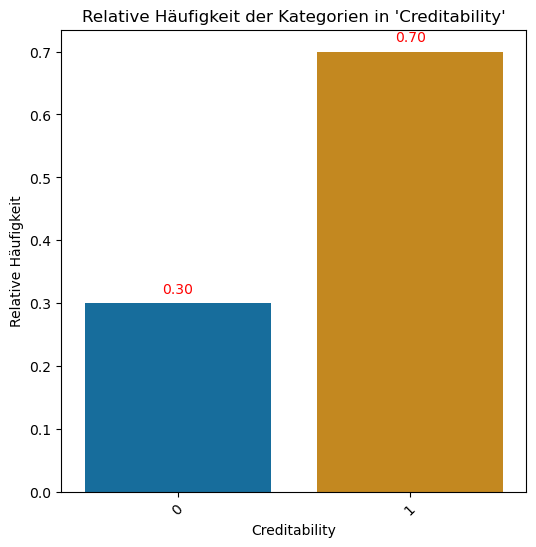


Relative Häufigkeit der Kategorien in 'Account Balance':


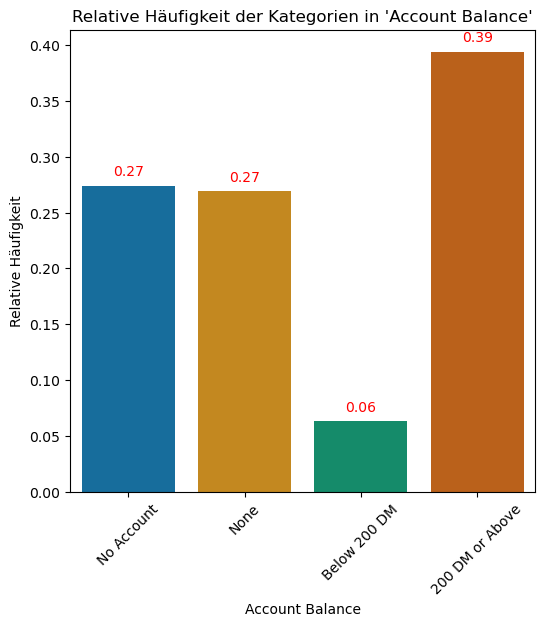


Relative Häufigkeit der Kategorien in 'Payment Status of Previous Credit':


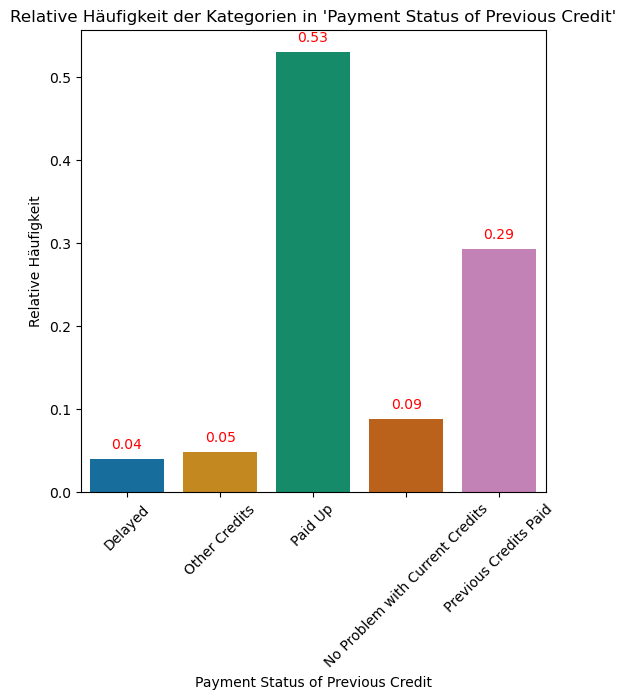


Relative Häufigkeit der Kategorien in 'Purpose':


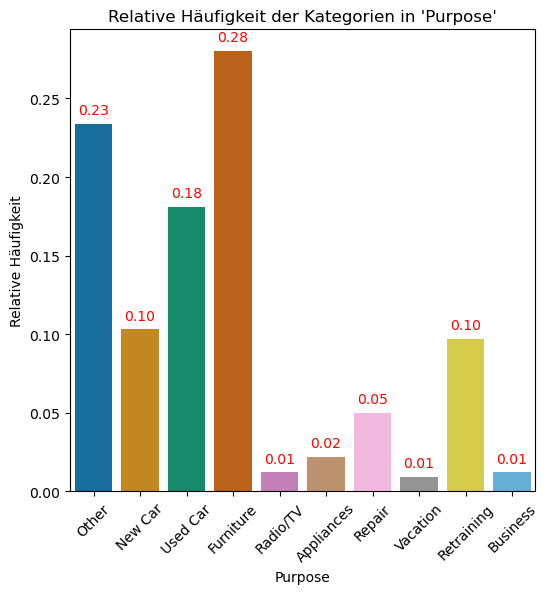


Relative Häufigkeit der Kategorien in 'Value Savings/Stocks':


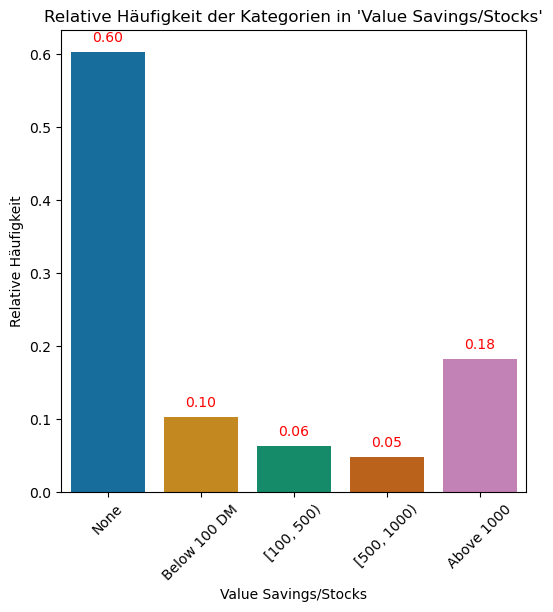


Relative Häufigkeit der Kategorien in 'Length of current employment':


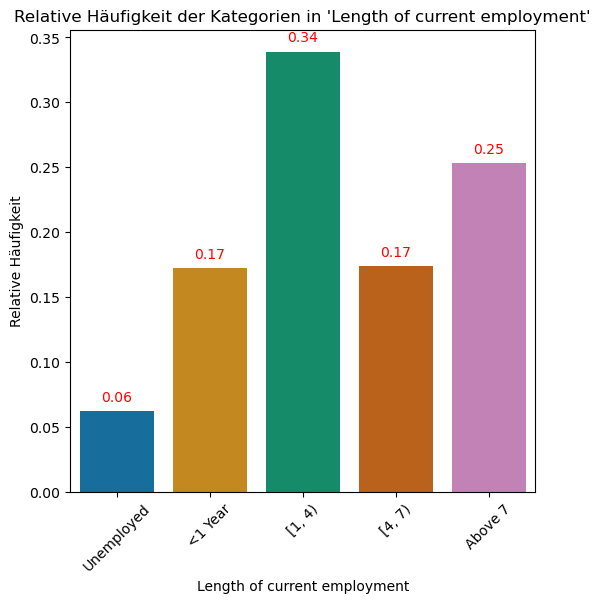


Relative Häufigkeit der Kategorien in 'Instalment per cent':


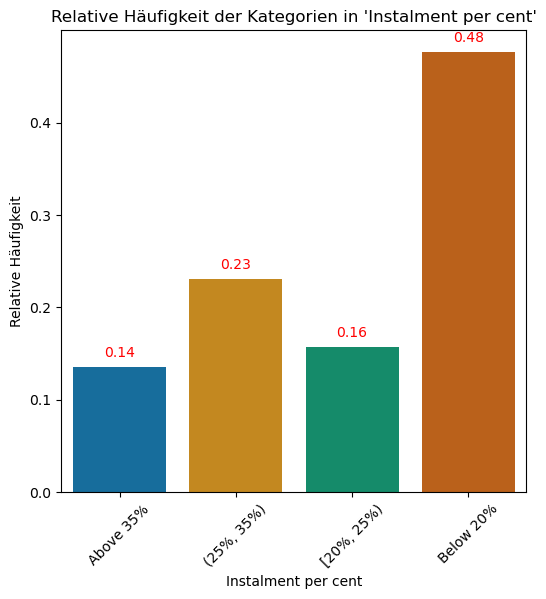


Relative Häufigkeit der Kategorien in 'Sex & Marital Status':


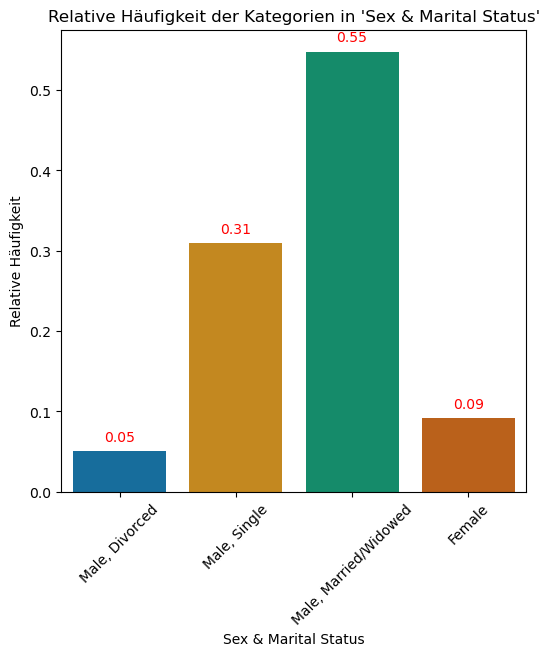


Relative Häufigkeit der Kategorien in 'Guarantors':


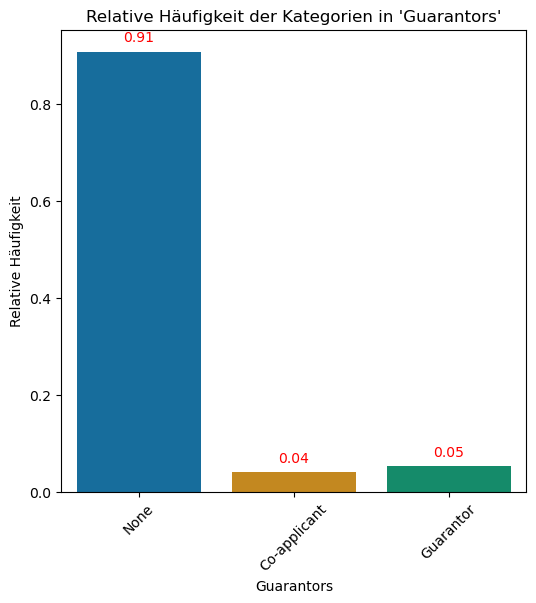


Relative Häufigkeit der Kategorien in 'Duration in Current address':


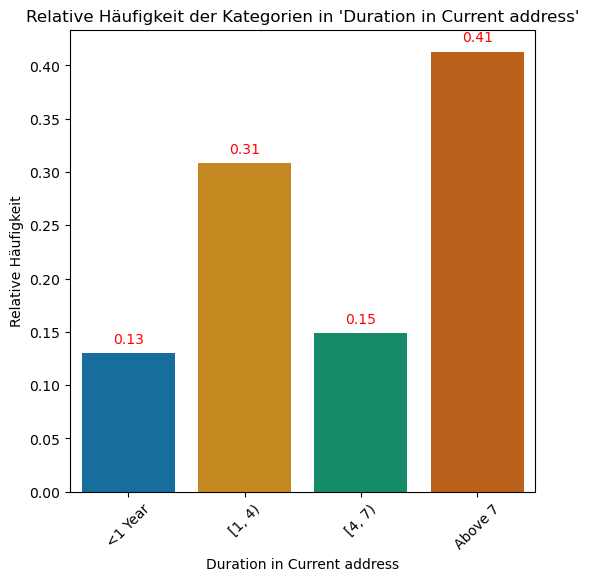


Relative Häufigkeit der Kategorien in 'Most valuable available asset':


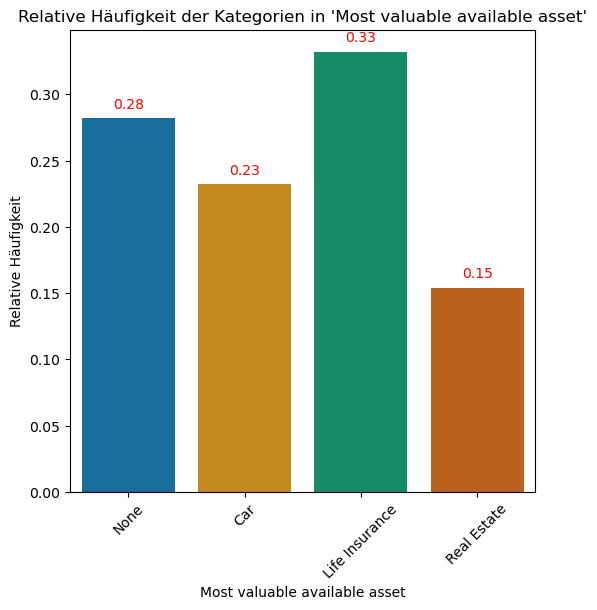


Relative Häufigkeit der Kategorien in 'Concurrent Credits':


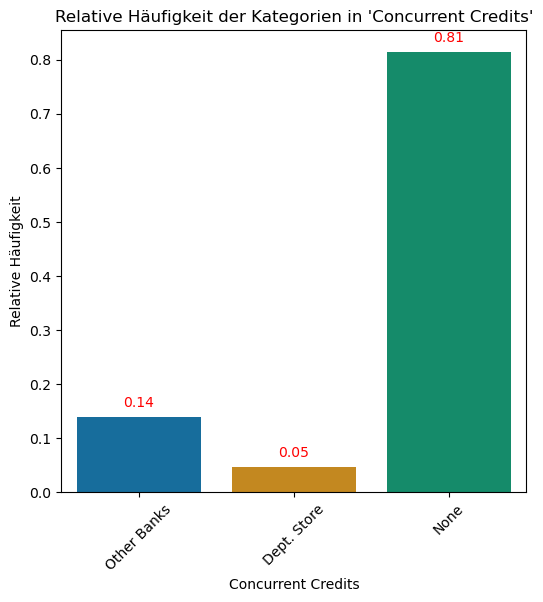


Relative Häufigkeit der Kategorien in 'Type of apartment':


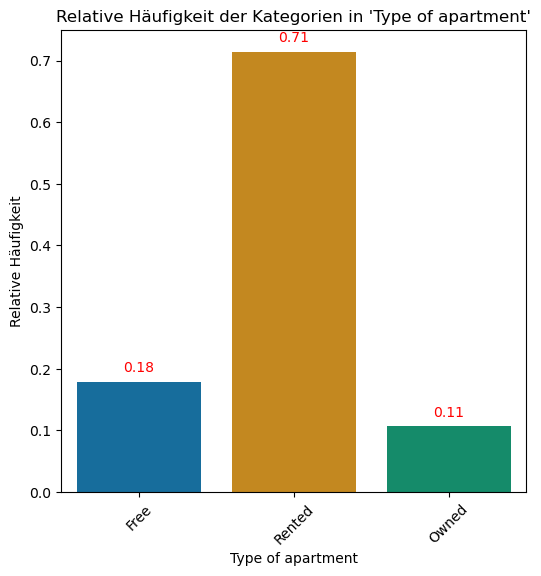


Relative Häufigkeit der Kategorien in 'No of Credits at this Bank':


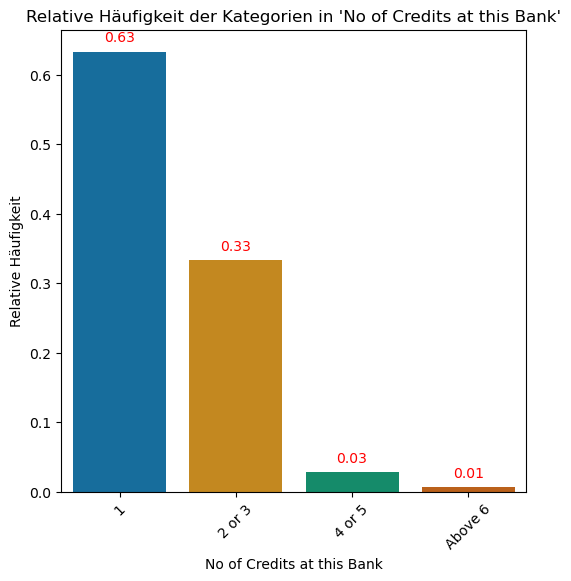


Relative Häufigkeit der Kategorien in 'Occupation':


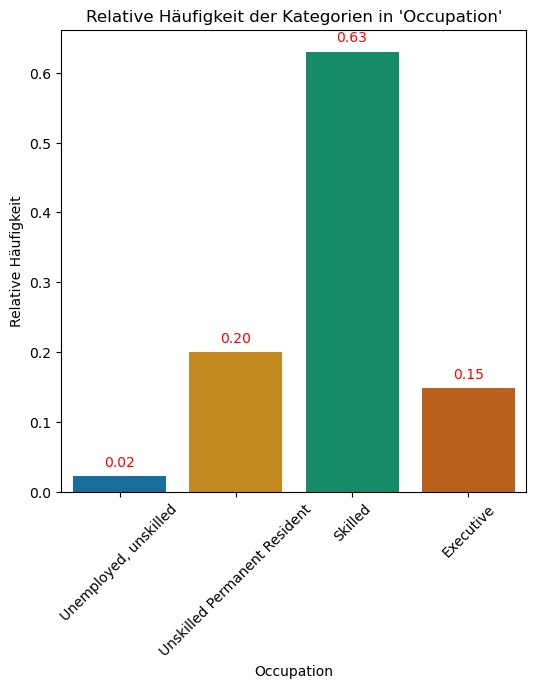


Relative Häufigkeit der Kategorien in 'No of dependents':


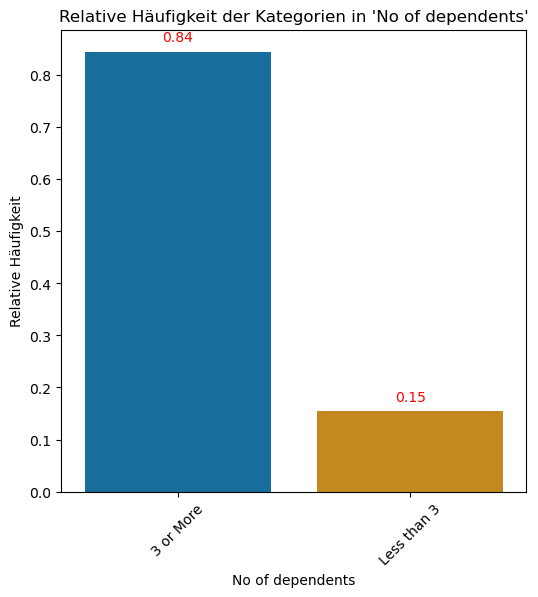


Relative Häufigkeit der Kategorien in 'Telephone':


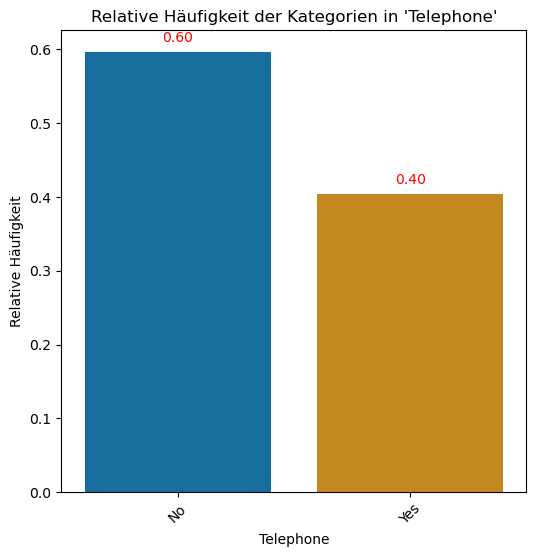


Relative Häufigkeit der Kategorien in 'Foreign Worker':


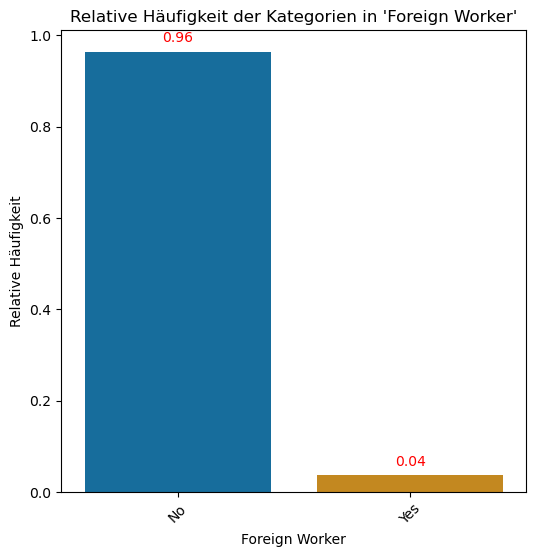

In [9]:

columns = ['Creditability', 'Account Balance',
       'Payment Status of Previous Credit', 'Purpose', 
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
        'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']

for column in columns:
    print(f"\nRelative Häufigkeit der Kategorien in '{column}':")
    freq = df_credit[column].value_counts(normalize=True)
    
    # Balkendiagramm mit seaborn
    plt.figure(figsize=(6,6))
    barplot = sns.barplot(x=freq.index, y=freq.values, palette="colorblind") # Verwenden Sie eine farbenblinde freundliche Farbpalette
    plt.title(f"Relative Häufigkeit der Kategorien in '{column}'")
    plt.ylabel('Relative Häufigkeit')
    plt.xlabel(column)
    
    # Anzeigen der xticks
    plt.xticks(rotation=45)
    
    # Hinzufügen der Prozentwerte in die Balken
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points',
                         color = 'red') # Textfarbe ist rot
    
    plt.show()


In [10]:
columns = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 
           'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent', 
           'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 
           'Most valuable available asset', 'Concurrent Credits', 'Type of apartment', 
           'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 
           'Foreign Worker']

for column in columns:
    print(f"\nVerteilung von '{column}' auf 'Creditability':")
    print(df_credit.groupby(column)['Creditability'].value_counts(normalize=True))



Verteilung von 'Account Balance' auf 'Creditability':
Account Balance  Creditability
No Account       1                0.507299
                 0                0.492701
None             1                0.609665
                 0                0.390335
Below 200 DM     1                0.777778
                 0                0.222222
200 DM or Above  1                0.883249
                 0                0.116751
Name: proportion, dtype: float64

Verteilung von 'Payment Status of Previous Credit' auf 'Creditability':
Payment Status of Previous Credit  Creditability
Delayed                            0                0.625000
                                   1                0.375000
Other Credits                      0                0.571429
                                   1                0.428571
Paid Up                            1                0.681132
                                   0                0.318868
No Problem with Current Credits    1             

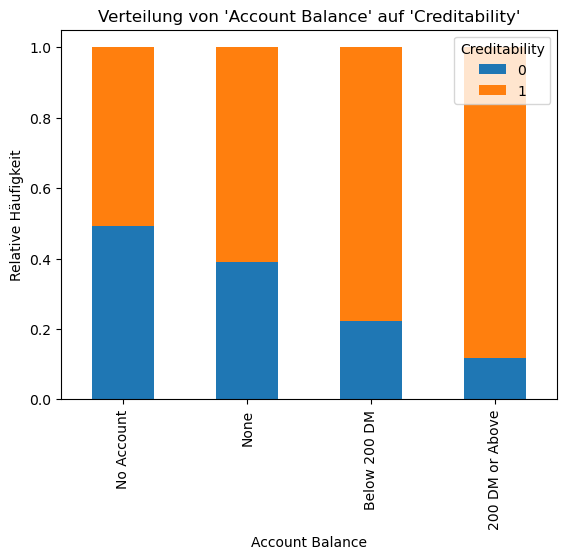

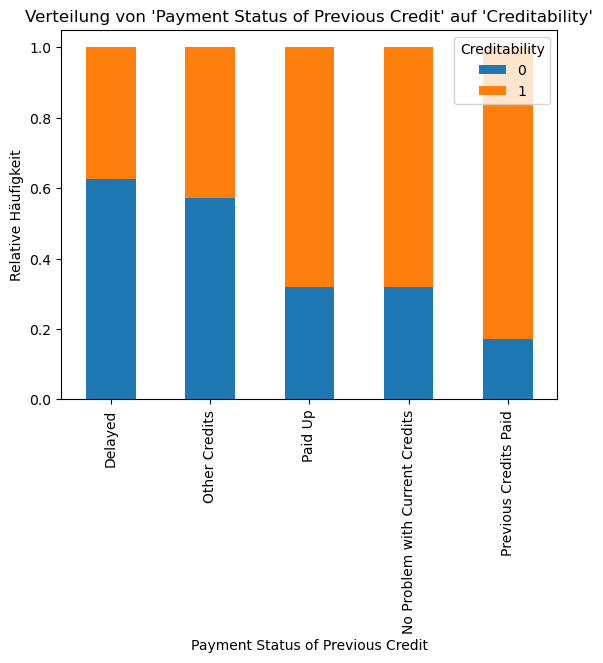

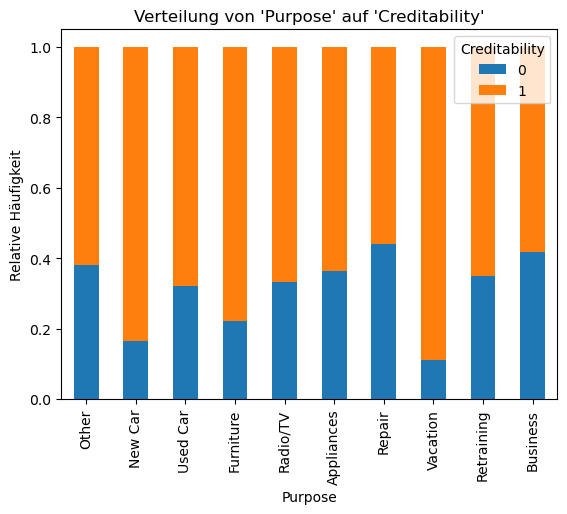

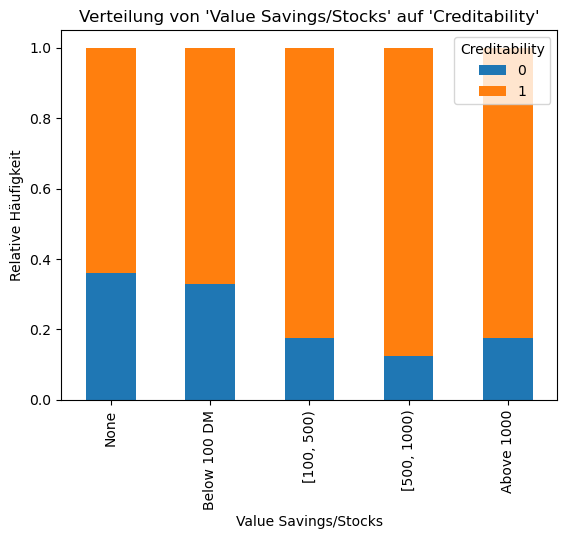

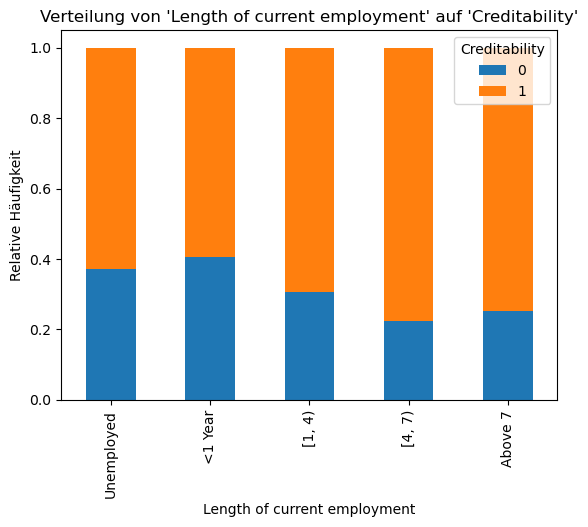

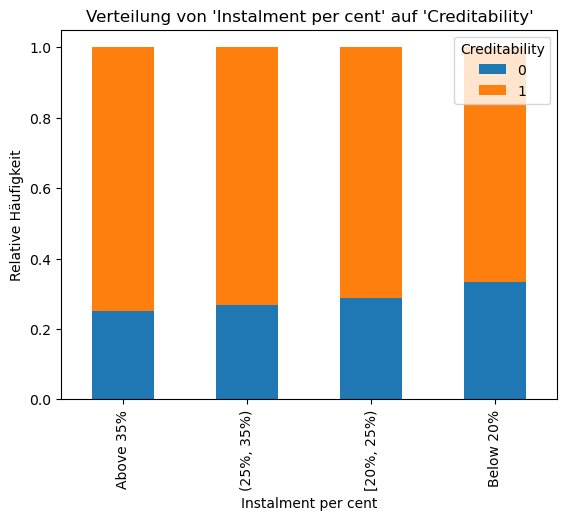

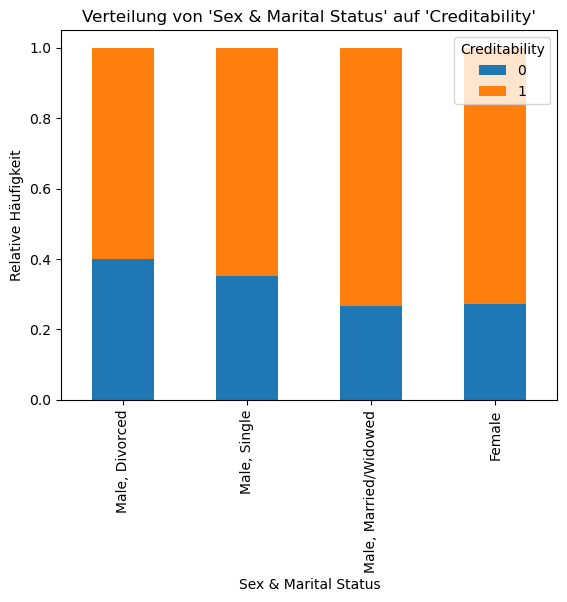

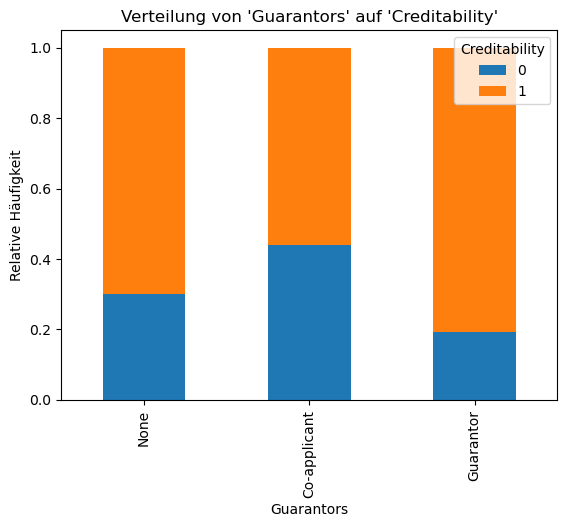

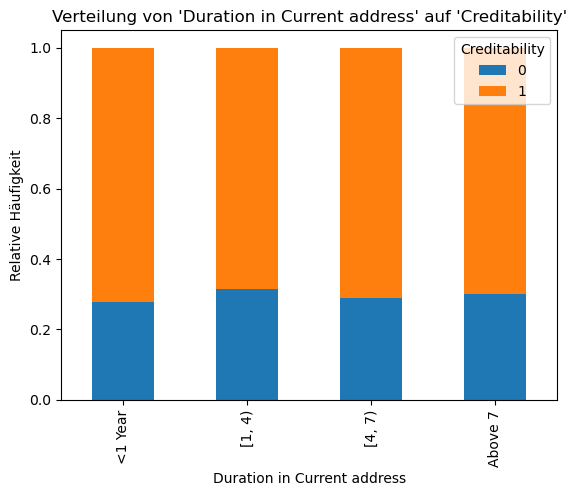

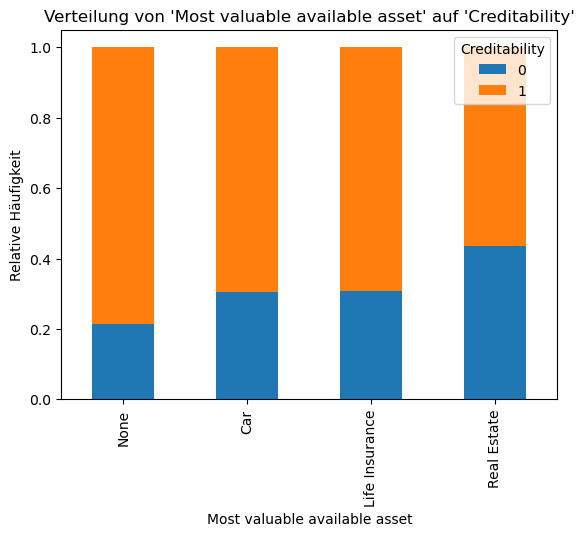

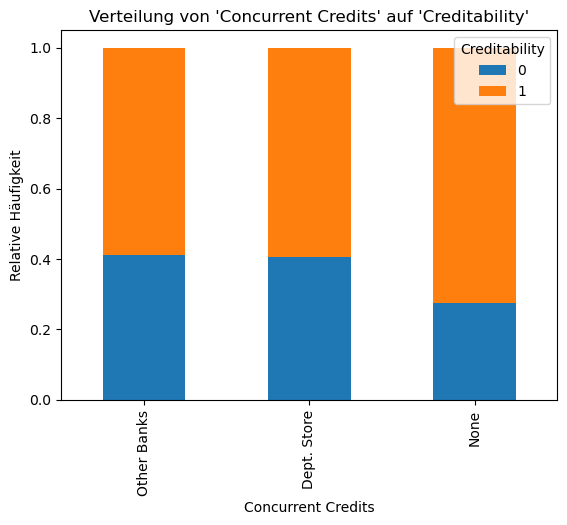

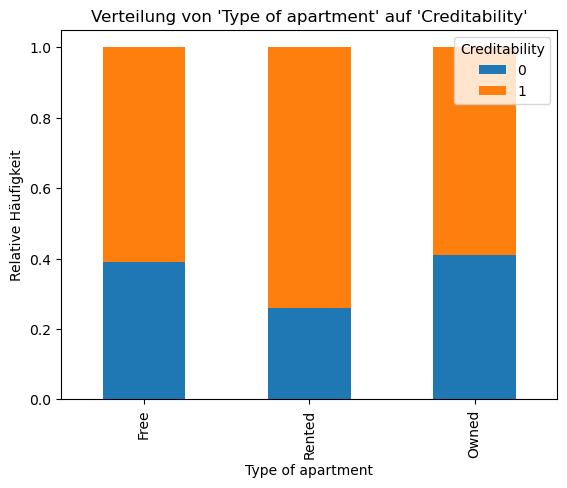

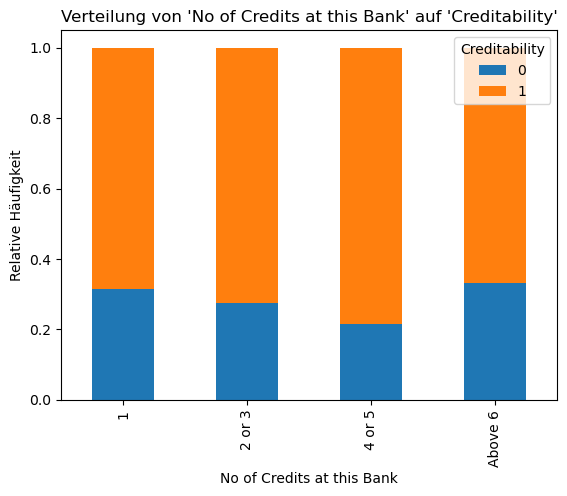

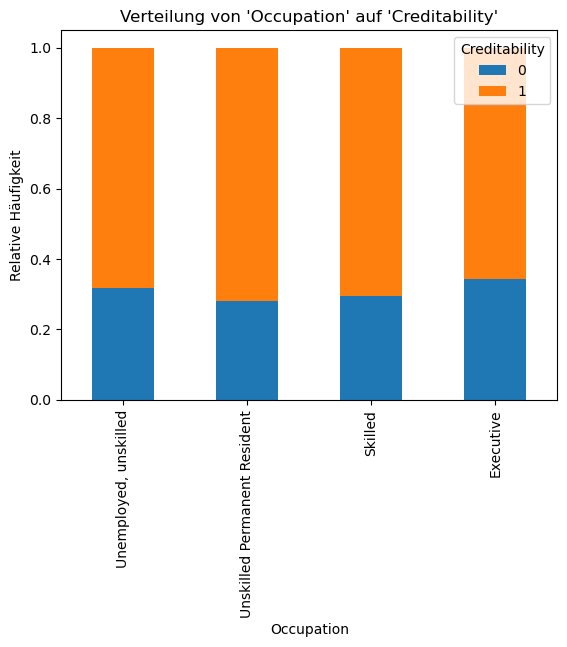

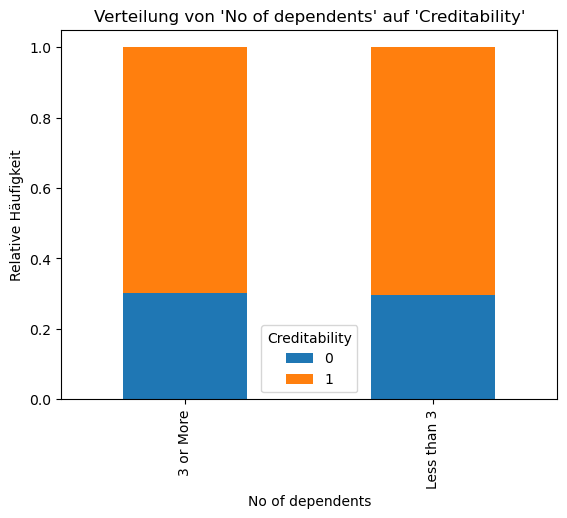

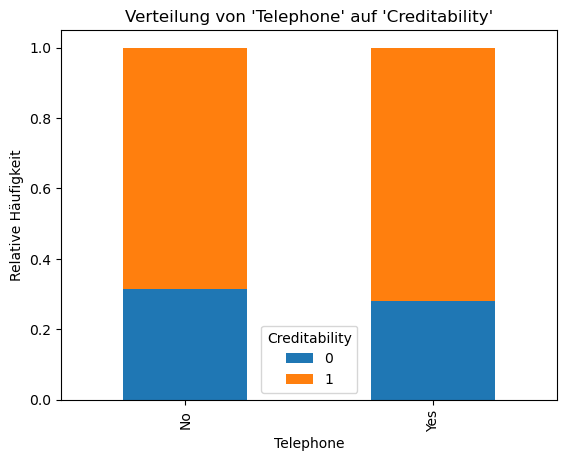

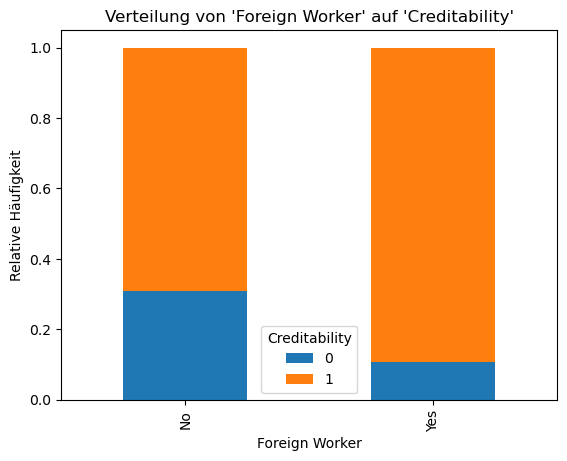

In [11]:
import matplotlib.pyplot as plt

columns = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 
           'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent', 
           'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 
           'Most valuable available asset', 'Concurrent Credits', 'Type of apartment', 
           'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 
           'Foreign Worker']

for column in columns:
    distribution = df_credit.groupby(column)['Creditability'].value_counts(normalize=True).unstack()
    distribution.plot(kind='bar', stacked=True)
    plt.title(f"Verteilung von '{column}' auf 'Creditability'")
    plt.ylabel('Relative Häufigkeit')
    plt.show()


# Einige Ausprägungen haben einen wesentlich höheren Anteil als andere

Wenn einige Ausprägungen einen wesentlich höheren Anteil haben als andere, kann dies zu einem unausgeglichenen Datensatz führen. Unausgewogene Datensätze können die Leistung vieler Arten von Klassifikationsmodellen beeinträchtigen.

### Auswirkungen von unausgewogenen Ausprägungen

Die Auswirkungen von unausgewogenen Ausprägungen sind besonders relevant für die Zielvariable, da sie direkt die Leistung des Modells und die Gültigkeit der Leistungsmetriken beeinflussen können.

### Unausgewogene Prädikatoren
Allerdings können auch unausgewogene Ausprägungen in den unabhängigen Prädikatoren zu Problemen führen. Wenn eine bestimmte Ausprägung in einem Prädikator dominiert, kann das Modell Schwierigkeiten haben, die Auswirkungen anderer Ausprägungen zu lernen. Dies könnte zu einer Verzerrung in der Art und Weise führen, wie das Modell die Beziehung zwischen den Prädikatoren und der Zielvariable lernt.

### Wichtigkeit der Verteilung
Es ist daher wichtig, sowohl die Verteilung der Zielvariable als auch die der Prädikatoren zu berücksichtigen, wenn man mit Klassifikationsmodellen arbeitet.


## Mögliche Folgen:

### Modellverzerrung
Das Modell könnte dazu neigen, Vorhersagen zugunsten der dominierenden Klassen zu treffen. Dies könnte dazu führen, dass das Modell eine geringere Vorhersagegenauigkeit für die weniger repräsentierten Klassen aufweist.

### Überanpassung
Wenn einige Ausprägungen überrepräsentiert sind, könnte das Modell dazu neigen, spezifische Muster in diesen Ausprägungen zu “überlernen”, was zu einer schlechten Generalisierung auf neue Daten führen kann.

### Leistungsmetriken
Metriken wie Genauigkeit könnten irreführend sein, da sie durch die dominierenden Klassen verzerrt werden könnten. Es wäre ratsam, zusätzliche Metriken wie die F1-Score, Precision, Recall oder die AUC-ROC-Kurve zu betrachten.



In [12]:
df_credit.head(1)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,No Account,18,Previous Credits Paid,Used Car,1049,None,<1 Year,Below 20%,"Male, Single",None,Above 7,Car,21,None,Free,1,Skilled,3 or More,No,No


# Kategorienzusammenfassung

 Ich führe eine **Kategorienzusammenfassung** durch, bei der die Ausprägungen jeder Kategorie so zusammengefasst werden, dass jede einzelne Ausprägung **mindestens 10%** der Gesamtausprägung der jeweiligen Kategorie ausmacht.

## Ziel

Das Ziel dieses Ansatzes ist es, ein **ausgeglicheneres Verhältnis** zwischen den verschiedenen Ausprägungen innerhalb jeder Kategorie zu schaffen.

## Anwendung

 Durch die Schaffung eines ausgeglicheneren Verhältnisses kann man erreichen, dass ein Modell nicht zu sehr durch die dominanten Ausprägungen verzerrt wird.


In [13]:
# Account Balance Below 200 DM und 200 DM or Above zusammenführen zu to200DM&More

In [14]:
df_credit['Account Balance'].unique()

# 'Below 200 DM' und 'None'

['No Account', 'None', '200 DM or Above', 'Below 200 DM']
Categories (4, object): ['No Account', 'None', 'Below 200 DM', '200 DM or Above']

In [15]:
# Die Ausprägungen Account Balance Below 200 DM und 200 DM or Above  zu  to200DM&More  zusammenführen:

# Dictionary für die Zuordnung
replace_dict = { 
                'Below 200 DM': 'to200DM&More', 
                '200 DM or Above': 'to200DM&More'}

# map-Funktion, um die Werte zu ersetzen
df_credit['Account Balance'] = df_credit['Account Balance'].map(replace_dict).fillna(df_credit['Account Balance'])


In [16]:
# Erstelle ein Dictionary Zuordnung
replace_dict = { 'Delayed' :'Critical', 
                'Other Credits' :'Critical',
                'No Problem with Current Credits' : 'Curr&Prev_Creds_OK',
                'Previous Credits Paid' : 'Curr&Prev_Creds_OK'
                    }

#  map-Funktion, um die Werte zu ersetzen
df_credit['Payment Status of Previous Credit'] = df_credit['Payment Status of Previous Credit'].map(replace_dict).fillna(df_credit['Payment Status of Previous Credit'])



In [17]:
# Erstelle ein Dictionary Zuordnung
replace_dict = { 'Below 100 DM':'up_to_1000', 
                '[100, 500)'     :'up_to_1000', 
                '[500, 1000)'    :'up_to_1000'
                
                    }

#  map-Funktion, um die Werte zu ersetzen
df_credit['Value Savings/Stocks'] = df_credit['Value Savings/Stocks'].map(replace_dict).fillna(df_credit['Value Savings/Stocks'])




In [18]:
# Erstelle ein Dictionary Zuordnung
replace_dict = { 'Unemployed'    :'unemployed&Below_1Year&', 
                '<1 Year'        :'unemployed&Below_1Year&' 
                
                
                    }

#  map-Funktion, um die Werte zu ersetzen
df_credit['Length of current employment'] = df_credit['Length of current employment'].map(replace_dict).fillna(df_credit['Length of current employment'])




In [19]:
# Erstelle ein Dictionary Zuordnung
replace_dict = { '2 or 3'         :'2 or more', 
                 '4 or 5'         :'2 or more',
                'Above 6'         :'2 or more'
                
                    }

#  map-Funktion, um die Werte zu ersetzen
df_credit['No of Credits at this Bank'] = df_credit['No of Credits at this Bank'].map(replace_dict).fillna(df_credit['No of Credits at this Bank'])




In [20]:
# Erstelle ein Dictionary Zuordnung
replace_dict = { 'Guarantor'           :  'Guarantor&Co-applicant', 
                 'Co-applicant'        :  'Guarantor&Co-applicant'
                             
                
                    }

#  map-Funktion, um die Werte zu ersetzen
df_credit['Guarantors'] = df_credit['Guarantors'].map(replace_dict).fillna(df_credit['Guarantors'])


In [21]:
# Erstelle ein Dictionary Zuordnung
replace_dict = { 'Other Banks'           :  'Other Banks&Dept. Store', 
                 'Dept. Store'           :  'Other Banks&Dept. Store'
                             
                
                    }

#  map-Funktion, um die Werte zu ersetzen
df_credit['Concurrent Credits'] = df_credit['Concurrent Credits'].map(replace_dict).fillna(df_credit['Concurrent Credits'])


In [22]:
# Erstelle ein Dictionary Zuordnung
replace_dict = { 'Radio/TV'     : 'Other' ,
                 'Appliances'   : 'Other' ,
                 'Repair'       : 'Other' ,
                 'Vacation'     : 'Other',
                 
                 'Business'     : 'Other'
                 
                             
                
                    }

#  map-Funktion, um die Werte zu ersetzen
df_credit['Purpose'] = df_credit['Purpose'].map(replace_dict).fillna(df_credit['Purpose'])


In [23]:
df_credit['Purpose'].unique()


array(['Used Car', 'Other', 'Retraining', 'Furniture', 'New Car'],
      dtype=object)

In [24]:
df_credit.drop('Foreign Worker', axis=1, inplace=True)

# Entfernung der Spalte 'Foreign Worker'

Die Spalte 'Foreign Worker' wird entfernt, da die Kategorie 'Yes' nur 3,6% und 'No' 96,3% der Daten ausmacht.

## Begründung

### Geringe Varianz

Die Kategorie 'No' macht einen sehr hohen Prozentsatz (96,3%) aus, was zu einer sehr geringen Varianz führt. Dies bedeutet, dass diese Variable wenig Informationen für die Unterscheidung zwischen den Klassen in der Zielvariable ('Creditability') liefert. Daher könnte es sinnvoll sein, sie zu entfernen.


### Vereinfachung des Modells

Das Entfernen von Variablen, die wenig zur Vorhersagekraft des Modells beitragen, kann dazu beitragen, das Modell zu vereinfachen und die Interpretierbarkeit zu verbessern, ohne die Leistung wesentlich zu beeinträchtigen.


# Verteilung der Metrische Variablen im Boxplot und im Histogramm

Zusammenfassungsstatistiken für Duration of Credit (month):
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration of Credit (month), dtype: float64
Zusammenfassungsstatistiken für Credit Amount:
count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit Amount, dtype: float64
Zusammenfassungsstatistiken für Age (years):
count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: Age (years), dtype: float64


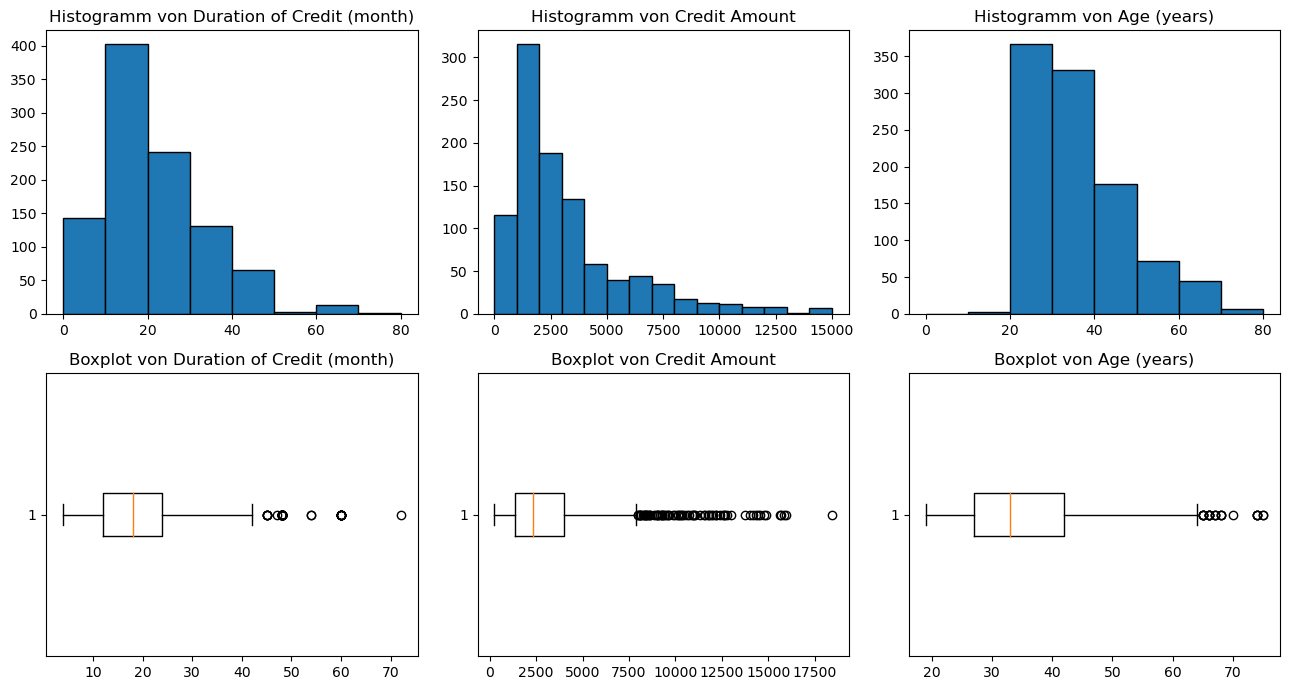

In [25]:

variables = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']

# Figur und Achsen für die Plots
fig, axs = plt.subplots(2, len(variables), figsize=(13, 7))

for i, var in enumerate(variables):
    # Zusammenfassungsstatistiken drucken
    print(f"Zusammenfassungsstatistiken für {var}:")
    print(df_credit[var].describe())
    
    # Histogramm erstellen
    axs[0, i].hist(df_credit[var], bins=range(0, 15001, 1000) if var == 'Credit Amount' else range(0, 81, 10), edgecolor='black')
    axs[0, i].set_title(f"Histogramm von {var}")
    
    # Boxplot erstellen
    axs[1, i].boxplot(df_credit[var], vert=False)
    axs[1, i].set_title(f"Boxplot von {var}")

plt.tight_layout()
plt.show()




###  Einige Beobachtungen:

1. **Dauer des Kredits (Monate)**: Das Histogramm zeigt eine rechtsschiefe Verteilung, was bedeutet, dass die meisten Kreditlaufzeiten auf der niedrigeren Seite liegen, mit einigen wenigen Krediten, die eine längere Laufzeit haben. 

2. **Kreditbetrag**: Das Histogramm zeigt ebenfalls eine rechtsschiefe Verteilung, was darauf hindeutet, dass die meisten Kredite einen niedrigeren Betrag haben, während einige wenige Kredite einen sehr hohen Betrag haben.

3. **Alter (Jahre)**: Das Histogramm zeigt eine relativ gleichmäßige Verteilung aber leicht rechtsschief, was darauf hindeutet, dass das Alter der Kreditnehmer über den gesamten Altersbereich ziemlich gut verteilt ist.

 


# Identifizierung signifikanter Prädiktoren in kategorialen Spalten

Die Identifizierung signifikanter Prädiktoren in kategorialen Spalten ist ein wichtiger Schritt in der Datenanalyse und Modellierung. Dieser Prozess ist wichtig aus folgenden Gründen:

1. **Modellgenauigkeit**: Signifikante Prädiktoren tragen wesentlich zur Genauigkeit des Vorhersagemodells bei. Sie helfen dem Modell, die zugrunde liegenden Muster in den Daten zu erfassen.

2. **Feature-Auswahl**: Durch die Identifizierung signifikanter Prädiktoren können wir die Dimensionalität der Daten reduzieren, indem wir nur die relevanten Features für die Modellierung auswählen.

3. **Interpretierbarkeit**: Signifikante Prädiktoren verbessern die Interpretierbarkeit des Modells. Sie helfen uns zu verstehen, welche Faktoren das Zielattribut am stärksten beeinflussen.

Um signifikante Prädiktoren in kategorialen Spalten zu identifizieren, können wir statistische Tests wie den Chi-Quadrat-Test verwenden. Dieser Test misst, ob es einen signifikanten Zusammenhang zwischen kategorialen Variablen gibt.

Wenn der p-Wert kleiner als das Signifikanzniveau (z.B. 0,05) ist, dann gibt es einen signifikanten Zusammenhang zwischen den Variablen und wir können sagen, dass die Variable ein signifikanter Prädiktor ist.


In [26]:


# Liste der kategorialen Variablen
cat_cols = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 
            'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 
            'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits', 
            'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 
            'Telephone']

# Chi-Quadrat-Test kategoriale Variable 
for col in cat_cols:
    contingency_table = pd.crosstab(df_credit[col], df_credit['Creditability'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for variable '{col}':")
    print(f"Chi-square statistic = {chi2}")
    print(f"p-value = {p}\n")


Chi-square test for variable 'Account Balance':
Chi-square statistic = 120.84376361168343
p-value = 5.7426208775458905e-27

Chi-square test for variable 'Payment Status of Previous Credit':
Chi-square statistic = 54.37609969095182
p-value = 1.557327592382252e-12

Chi-square test for variable 'Purpose':
Chi-square statistic = 29.171682756300058
p-value = 7.21406128681023e-06

Chi-square test for variable 'Value Savings/Stocks':
Chi-square statistic = 27.814498268456457
p-value = 9.123436266513807e-07

Chi-square test for variable 'Length of current employment':
Chi-square statistic = 18.086884818120975
p-value = 0.0004220684889568761

Chi-square test for variable 'Instalment per cent':
Chi-square statistic = 5.476792145153753
p-value = 0.1400333122128481

Chi-square test for variable 'Sex & Marital Status':
Chi-square statistic = 9.60521395933605
p-value = 0.02223800546926877

Chi-square test for variable 'Guarantors':
Chi-square statistic = 0.0
p-value = 1.0

Chi-square test for variab

## Identifizierung signifikanter Prädiktoren mit T-Test für kontinuierliche Variablen

Der T-Test ist eine statistische Hypothesentest-Technik, die verwendet wird, um zu bestimmen, ob es einen signifikanten Unterschied zwischen den Mittelwerten von zwei Gruppen gibt, die durch eine kontinuierliche Variable repräsentiert werden. Dieser Prozess ist wichtig aus folgenden Gründen:

1. **Modellgenauigkeit**: Ähnlich wie bei kategorialen Variablen tragen auch signifikante kontinuierliche Variablen zur Genauigkeit des Vorhersagemodells bei.

2. **Feature-Auswahl**: Der T-Test hilft uns, die relevantesten kontinuierlichen Variablen für die Modellierung auszuwählen.

3. **Interpretierbarkeit**: Signifikante kontinuierliche Variablen verbessern die Interpretierbarkeit des Modells, indem sie uns helfen zu verstehen, welche Faktoren das Zielattribut am stärksten beeinflussen.

Wenn der p-Wert kleiner als das Signifikanzniveau (z.B. 0,05) ist, dann gibt es einen signifikanten Unterschied zwischen den Mittelwerten der beiden Gruppen und wir können sagen, dass die Variable ein signifikanter Prädiktor ist.


In [27]:


# Liste der kontinuierlichen Variablen
cont_cols = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']

# Wörterbuch zur Speicherung der p-Werte
p_values = {}

#T-Test für jede kontinuierliche Variable durch
for col in cont_cols:
    group1 = df_credit[df_credit['Creditability'] == 0][col]
    group2 = df_credit[df_credit['Creditability'] == 1][col]
    t_stat, p = ttest_ind(group1, group2)
    p_values[col] = p

# Sortiere Wörterbuch nach p-Werten
sorted_p_values = sorted(p_values.items(), key=lambda x: x[1])

# Ergebnisse
for col, p in sorted_p_values:
    print(f"T-test for variable '{col}':")
    print(f"p-value = {p}\n")


T-test for variable 'Duration of Credit (month)':
p-value = 6.4880498771843485e-12

T-test for variable 'Credit Amount':
p-value = 8.795399017201812e-07

T-test for variable 'Age (years)':
p-value = 0.003868455281306576



## Dummy-Kodierung von kategorialen Spalten

Die Dummy-Kodierung ist eine häufig verwendete Methode zur Umwandlung von kategorialen Variablen in eine Form, die für maschinelles Lernen und statistische Modelle geeignet ist. Dieser Prozess ist wichtig aus folgenden Gründen:

1. **Modellkompatibilität**: Viele maschinelle Lernmodelle können nur mit numerischen Eingaben umgehen. Die Dummy-Kodierung ermöglicht es uns, kategoriale Daten in eine numerische Form umzuwandeln, die von diesen Modellen verarbeitet werden kann.

2. **Interpretierbarkeit**: Dummy-Variablen verbessern die Interpretierbarkeit des Modells, indem sie uns helfen zu verstehen, wie verschiedene Kategorien das Zielattribut beeinflussen.



In [28]:


# Liste der ermittelten,kategorischen Spalten, die in Dummy-Variablen umgewandelt werden sollen

cols_to_transform = ['Account Balance','Payment Status of Previous Credit', 
'Purpose','Value Savings/Stocks','Length of current employment',
'Sex & Marital Status','Most valuable available asset','Concurrent Credits','Type of apartment']

# Dummy-Variablen für die ausgewählten Spalten, löscht Sie die erste Dummy-Spalte jeder kategorialen Variable
df_codiert = pd.get_dummies(df_credit, columns=cols_to_transform, drop_first=True)


df_codiert.head(2)

,Creditability,Duration of Credit (month),Credit Amount,Instalment per cent,Guarantors,Duration in Current address,Age (years),No of Credits at this Bank,Occupation,No of dependents,Telephone,Account Balance_None,Account Balance_to200DM&More,Payment Status of Previous Credit_Curr&Prev_Creds_OK,Payment Status of Previous Credit_Paid Up,Purpose_New Car,Purpose_Other,Purpose_Retraining,Purpose_Used Car,Value Savings/Stocks_None,Value Savings/Stocks_up_to_1000,"Length of current employment_[1, 4)","Length of current employment_[4, 7)",Length of current employment_unemployed&Below_1Year&,"Sex & Marital Status_Male, Single","Sex & Marital Status_Male, Married/Widowed",Sex & Marital Status_Female,Most valuable available asset_Car,Most valuable available asset_Life Insurance,Most valuable available asset_Real Estate,Concurrent Credits_Other Banks&Dept. Store,Type of apartment_Rented,Type of apartment_Owned
0,1,18,1049,Below 20%,None,Above 7,21,1,Skilled,3 or More,No,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False
1,1,9,2799,"(25%, 35%)",None,"[1, 4)",36,2 or more,Skilled,Less than 3,No,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False


## Löschen von nicht benötigten Spalten für das logistische Modell

Das Löschen von Spalten, die für das logistische Modell nicht benötigt werden, ist ein wichtiger Schritt in der Datenvorbereitung. Dieser Prozess ist wichtig aus folgenden Gründen:

1. **Vereinfachung des Modells**: Durch das Entfernen von nicht relevanten Spalten können wir das Modell vereinfachen und die Rechenzeit reduzieren.

2. **Vermeidung von Overfitting**: Das Entfernen von nicht relevanten Spalten kann dazu beitragen, Overfitting zu vermeiden, da jedes zusätzliche Feature das Modell komplexer macht und das Risiko von Overfitting erhöht.

3. **Verbesserung der Modellinterpretierbarkeit**: Ein Modell mit weniger Features ist einfacher zu interpretieren und zu verstehen.




In [29]:

spalten = ['Instalment per cent', 'Guarantors', 'Duration in Current address', 
           'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone']

df_codiert.drop(columns=spalten, inplace=True)


In [30]:
# Spalten die übrig bleiben.

print(df_codiert.columns)

print(len(df_codiert.columns))

Index(['Creditability', 'Duration of Credit (month)', 'Credit Amount',
       'Age (years)', 'Account Balance_None', 'Account Balance_to200DM&More',
       'Payment Status of Previous Credit_Curr&Prev_Creds_OK',
       'Payment Status of Previous Credit_Paid Up', 'Purpose_New Car',
       'Purpose_Other', 'Purpose_Retraining', 'Purpose_Used Car',
       'Value Savings/Stocks_None', 'Value Savings/Stocks_up_to_1000',
       'Length of current employment_[1, 4)',
       'Length of current employment_[4, 7)',
       'Length of current employment_unemployed&Below_1Year&',
       'Sex & Marital Status_Male, Single',
       'Sex & Marital Status_Male, Married/Widowed',
       'Sex & Marital Status_Female', 'Most valuable available asset_Car',
       'Most valuable available asset_Life Insurance',
       'Most valuable available asset_Real Estate',
       'Concurrent Credits_Other Banks&Dept. Store',
       'Type of apartment_Rented', 'Type of apartment_Owned'],
      dtype='object')
26


# Aufteilen der Daten und Anwendung von SMOTE

## Aufteilen der Daten

1. **Definition der Variablen**: `X` sind die unabhängigen Variablen, die alle Merkmale im Datensatz `df_codiert` außer 'Creditability' enthalten. `y` ist die abhängige Variable, die das Zielmerkmal 'Creditability' darstellt.

2. **Aufteilung der Daten**: `X` und `y` werden in Trainings- und Testsets aufgeteilt, wobei 70% der Daten für das Training und 30% für das Testen verwendet werden.

3. **Ausgabe der Datensatzgröße**: Die Größe der erstellten Datensätze wird ausgegeben, um einen Überblick über die Anzahl der verwendeten Datenpunkte zu erhalten.

## Anwendung von SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) ist eine Technik zur Behebung von Klassenungleichgewichten, indem synthetische Beispiele für die Minderheitsklasse erzeugt werden.

1. **Erkennung der Minderheitsklasse**: SMOTE erkennt die Minderheitsklasse in `y` automatisch. 

2. **Erzeugung synthetischer Beispiele**: SMOTE erzeugt neue, synthetische Beispiele für die Minderheitsklasse. 

Durch diese Methode stellt SMOTE sicher, dass die Minderheitsklasse auf die gleiche Anzahl von Beispielen erhöht wird wie die Mehrheitsklasse, wodurch das Klassenungleichgewicht behoben wird.


In [31]:
from imblearn.over_sampling import SMOTE

# Definiere  Variable (X) und die abhängige Variable (y)
X = df_codiert.drop('Creditability', axis=1)
y = df_codiert['Creditability']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7, random_state=42)



# Form der Datensätze

print("Training set:")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\nTest set:")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

print("Trainingsdaten Verteilung:")
print(y_train.value_counts())

print("\nTestdaten Verteilung:")
print(y_test.value_counts())

Training set:
X_train:  (979, 25)
y_train:  (979,)

Test set:
X_test:  (421, 25)
y_test:  (421,)
Trainingsdaten Verteilung:
Creditability
0    491
1    488
Name: count, dtype: int64

Testdaten Verteilung:
Creditability
1    212
0    209
Name: count, dtype: int64


- Die SMOTE-Methode wurde verwendet, um die Minderheitsklasse zu überabtasten und ein ausgewogenes Verhältnis zwischen den Klassen herzustellen.
- Der Trainingsdatensatz enthält 491 Instanzen der Klasse 0 und 488 Instanzen der Klasse 1, was nahezu ausgeglichen ist.
- Der Testdatensatz enthält 212 Instanzen der Klasse 1 und 209 Instanzen der Klasse 0, was ebenfalls nahezu ausgeglichen ist.
- Die Überprüfung der Klassenverteilung in den Trainings- und Testdatensätzen bestätigt, dass das Modell auf einer ausgewogenen Datengrundlage trainiert und getestet wird.


## Logistisches Regressionsmodell erstellen

Die logistische Regression ist ein statistisches Modell, das in der Regel verwendet wird, um die Wahrscheinlichkeit einer binären abhängigen Variablen zu modellieren. In der Maschinenlernsprache ist es ein Supervised-Learning-Algorithmus für die Klassifikation.

In [32]:


# LogisticRegression-Objekt
log_reg = LogisticRegression(max_iter=4000)
# Trainiere das Modell mit Trainingsdaten
log_reg.fit(X_train, y_train)

# Vorhersagen auf Testdaten machen
y_pred_logreg = log_reg.predict(X_test)


# Konfusionsmatrix und Klassifikationsbericht

Die **Konfusionsmatrix** ist ein nützliches Werkzeug zur Bewertung der Qualität eines Klassifikationsmodells.
 Sie zeigt die Anzahl der korrekten und falschen Vorhersagen für jede Klasse.

- **True Positives (TP)**: Anzahl der korrekten positiven Vorhersagen.
- **True Negatives (TN)**: Anzahl der korrekten negativen Vorhersagen.
- **False Positives (FP)**: Anzahl der falschen positiven Vorhersagen.
- **False Negatives (FN)**: Anzahl der falschen negativen Vorhersagen.

Diese Werte werden verwendet, um die Leistung deines Modells zu analysieren

Der **Klassifikationsbericht** enthält weitere Informationen zur Modellleistung:

- **Genauigkeit (Accuracy)**: Anteil der korrekten Vorhersagen insgesamt.
- **Präzision (Precision)**: Anteil der korrekten positiven Vorhersagen unter allen positiven Vorhersagen.
- **Recall (Sensitivity)**: Anteil der korrekten positiven Vorhersagen unter allen tatsächlich positiven Fällen.
- **F1-Score**: Harmonisches Mittel aus Präzision und Recall.

Diese Werte werden verwendet, um die Effektivität des Modells zu bewerten.



Konfusionsmatrix:
                Vorhergesagte 0  Vorhergesagte 1
Tatsächliche 0              174               35
Tatsächliche 1               37              175
Anzahl der wahren Negativen: 174
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       209
           1       0.83      0.83      0.83       212

    accuracy                           0.83       421
   macro avg       0.83      0.83      0.83       421
weighted avg       0.83      0.83      0.83       421



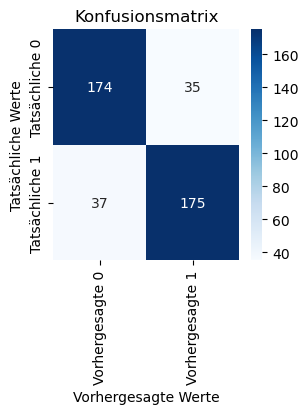

In [33]:
#  Konfusionsmatrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
# Konfusionsmatrix in einen DataFrame
cm_df_logreg = pd.DataFrame(cm_logreg, index=['Tatsächliche 0', 'Tatsächliche 1'], columns=['Vorhergesagte 0', 'Vorhergesagte 1'])

# Konfusionsmatrix
print('Konfusionsmatrix:')
print(cm_df_logreg)

# Anzahl der wahren Negativen (die tatsächlichen 0, die korrekt als 0 vorhergesagt wurden)
true_negatives = cm_logreg[0][0]
print('Anzahl der wahren Negativen:', true_negatives)

print('Klassifikationsbericht:')
print(classification_report(y_test, y_pred_logreg))

# Visualisieren Konfusionsmatrix mit seaborn
plt.figure(figsize=(3,3))
sns.heatmap(cm_df_logreg, annot=True, fmt='g', cmap='Blues')
plt.title('Konfusionsmatrix')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Tatsächliche Werte')
plt.show()

- **Genauigkeit**: Dies ist ein nützlicher Indikator, wenn die Kosten für falsche Positive und falsche Negative ähnlich sind. Wenn das Modell jedoch mit unausgewogenen Daten arbeitet (z.B. wenn die Anzahl der kreditwürdigen Personen viel größer ist als die Anzahl der nicht kreditwürdigen Personen), kann die Genauigkeit irreführend sein.

- **Fehlerrate**: Dies ist einfach das Gegenteil der Genauigkeit. Es kann nützlich sein, wenn die Gesamtzahl der Fehler reduziert werden soll, unabhängig davon, ob es sich um falsche Positive oder falsche Negative handelt.

- **Sensitivität (Recall)**: Dies ist besonders wichtig, wenn die Kosten für falsche Negative hoch sind. In meinem Fall wäre ein falsches Negativ, wenn ein Kreditnehmer als nicht kreditwürdig eingestuft wird, obwohl er tatsächlich kreditwürdig ist. Wenn es sehr wichtig ist, solche Fälle zu vermeiden, sollte ich mich auf die Sensitivität konzentrieren.

- **Spezifität**: Dies ist besonders wichtig, wenn die Kosten für falsche Positive hoch sind. Ein falsches Positiv wäre in meinem Fall, wenn ein Kreditnehmer als kreditwürdig eingestuft wird, obwohl er tatsächlich nicht kreditwürdig ist. Wenn es sehr wichtig ist, solche Fälle zu vermeiden, sollte ich mich auf die Spezifität konzentrieren.

- **Präzision**: Dies ist wichtig, wenn die Kosten für falsche Positive hoch sind. Es misst, wie viele der als positiv klassifizierten Beispiele tatsächlich positiv waren. In meinem Fall, da ich Kreditwürdigkeit vorhersage, könnten **Sensitivität** und **Präzision** besonders wichtig sein, da die Kosten für falsche Negative (ein riskanter Kreditnehmer wird als sicher eingestuft) und falsche Positive (ein sicherer Kreditnehmer wird als riskant eingestuft) sehr hoch sein können.


In [34]:
# Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
true_positives = cm_logreg[1][1]
false_positives = cm_logreg[0][1]
false_negatives = cm_logreg[1][0]

# Genauigkeit
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print('Genauigkeit:', accuracy)

# Fehlerrate
error_rate = 1 - accuracy
print('Fehlerrate:', error_rate)

# Sensitivität
sensitivity = true_positives / (true_positives + false_negatives)
print('Sensitivität:', sensitivity)

# Spezifität
specificity = true_negatives / (true_negatives + false_positives)
print('Spezifität:', specificity)

# Präzision
precision = true_positives / (true_positives + false_positives)
print('Präzision:', precision)


Genauigkeit: 0.828978622327791
Fehlerrate: 0.17102137767220904
Sensitivität: 0.8254716981132075
Spezifität: 0.8325358851674641
Präzision: 0.8333333333333334


# Optimierung der logistischen Regression mit GridSearchCV 

Die logistische Regression ist ein maschinelles Lernverfahren, das zur Vorhersage von binären Ergebnissen verwendet wird. Es gibt verschiedene Parameter, die in der logistischen Regression eingestellt werden können, wie z.B. `C` (Inverse der Regularisierungsstärke) und `penalty` (Art der zu verwendenden Regularisierung).

`GridSearchCV` aus der `sklearn.model_selection` Bibliothek bietet eine systematische Weise, um die besten Parameter für ein Modell zu finden. Es tut dies, indem es eine "Gitter" von Parametern erstellt und dann das Modell mit jeder Kombination von Parametern trainiert, um die beste Kombination zu finden.

Zusätzlich zu `GridSearchCV` kann auch `RandomizedSearchCV` aus der `sklearn.model_selection` Bibliothek verwendet werden. Während `GridSearchCV` alle möglichen Parameterkombinationen durchläuft, wählt `RandomizedSearchCV` eine festgelegte Anzahl von Parameterkombinationen zufällig aus. Dies kann bei der Optimierung von Modellen hilfreich sein, insbesondere wenn die Anzahl der Parameter und/oder die Datensatzgröße groß ist, da `RandomizedSearchCV` in der Regel schneller ist.

Beide Methoden, `GridSearchCV` und `RandomizedSearchCV`, können effektiv verwendet werden, um die besten Parameter für die logistische Regression zu finden und die Vorhersagegenauigkeit zu verbessern.


In [35]:
#Modell
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Parameterwerte, die untersucht werden sollen
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'penalty': ['l1', 'l2']}

# GridSearchCV
grid = GridSearchCV(logreg, params, cv=5)
grid.fit(X_train, y_train)
# besten Parameter
print("Beste Parameter: ", grid.best_params_)

Beste Parameter:  {'C': 1, 'penalty': 'l2'}


In [36]:
from sklearn.model_selection import RandomizedSearchCV


# Modell
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

#Parameterwerte, die untersucht werden sollen
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'penalty': ['l1', 'l2']}

# RandomizedSearchCV
random = RandomizedSearchCV(logreg, params, cv=5, n_iter=10, random_state=42)
random.fit(X_train, y_train)

# besten Parameter
print("Beste Parameter: ", random.best_params_)


Beste Parameter:  {'penalty': 'l2', 'C': 0.1}


In [37]:
### Beste Parameter:  {'C': 1, 'penalty': 'l2'}      GridSearchCV
### Beste Parameter:  {'penalty': 'l2', 'C': 0.1}    RandomizedSearchCV

In [38]:
# Test mit besten  Parametern :

In [39]:


# LogisticRegression-Objekt mit den besten Parametern
log_reg_paraTU = LogisticRegression(C=0.1, penalty='l2',max_iter=4000)


# Genauigkeit: 0.8210023866348448
# Fehlerrate: 0.17899761336515518
# Sensitivität: 0.8018867924528302
# Spezifität: 0.8405797101449275
# Präzision: 0.8374384236453202
#---> leicht besser

#log_reg_paraTU = LogisticRegression(C=1, penalty='l2',max_iter=4000)

# Ergebnis : 
# Genauigkeit: 0.828978622327791
# Fehlerrate: 0.17102137767220904
# Sensitivität: 0.8254716981132075
# Spezifität: 0.8325358851674641
# Präzision: 0.8333333333333334



log_reg_paraTU.fit(X_train, y_train)

y_pred_logreg_paraTU = log_reg_paraTU.predict(X_test)



In [40]:

# Konfusionsmatrix
conf_mat_LGT2 = confusion_matrix(y_test, y_pred_logreg_paraTU)


print("Konfusionsmatrix:")
print(conf_mat_LGT2)

# Klassifikationsmetriken
report = classification_report(y_test, y_pred_logreg_paraTU)


print("\nKlassifikationsbericht:")
print(report)

Konfusionsmatrix:
[[176  33]
 [ 42 170]]

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       209
           1       0.84      0.80      0.82       212

    accuracy                           0.82       421
   macro avg       0.82      0.82      0.82       421
weighted avg       0.82      0.82      0.82       421



In [41]:
# Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
true_positives = conf_mat_LGT2 [1][1]
false_positives = conf_mat_LGT2 [0][1]
false_negatives = conf_mat_LGT2 [1][0]

# Genauigkeit
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print('Genauigkeit:', accuracy)

# Fehlerrate
error_rate = 1 - accuracy
print('Fehlerrate:', error_rate)

# Sensitivität
sensitivity = true_positives / (true_positives + false_negatives)
print('Sensitivität:', sensitivity)

# Spezifität
specificity = true_negatives / (true_negatives + false_positives)
print('Spezifität:', specificity)

# Präzision
precision = true_positives / (true_positives + false_positives)
print('Präzision:', precision)

Genauigkeit: 0.8210023866348448
Fehlerrate: 0.17899761336515518
Sensitivität: 0.8018867924528302
Spezifität: 0.8405797101449275
Präzision: 0.8374384236453202


# Entscheidungsbaum

Ein **Entscheidungsbaum** ist ein geordneter, gerichteter Baum, der zur Darstellung von Entscheidungsregeln dient. 
Hierbei werden hierarchisch aufeinanderfolgende Entscheidungen grafisch als Baumdiagramm veranschaulicht.

In der Praxis funktioniert ein Entscheidungsbaum folgendermaßen:
- Vom Wurzelknoten aus geht man entlang des Baumes abwärts.
- Bei jedem Knoten wird ein Attribut abgefragt, und eine Entscheidung über die Auswahl des folgenden Knotens getroffen.
- Diese Prozedur wird so lange fortgesetzt, bis man ein Blatt erreicht.
- Das Blatt entspricht der Klassifikation oder Antwort auf das Entscheidungsproblem.


In [42]:
# DecisionTreeClassifier Objekt
dt_clf = DecisionTreeClassifier()

# Trainiere Modell mit  Trainingsdaten
dt_clf.fit(X_train, y_train)

# Vorhersagen Testdaten machen
y_pred_dt = dt_clf.predict(X_test)


In [43]:
# Entscheidungsbaum Matrix und Klassifikationsbericht

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       209
           1       0.79      0.73      0.76       212

    accuracy                           0.76       421
   macro avg       0.77      0.77      0.76       421
weighted avg       0.77      0.76      0.76       421



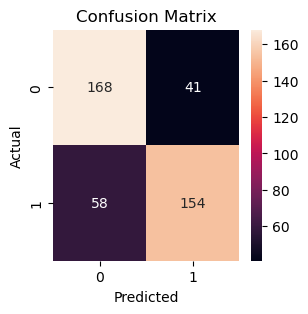

In [44]:

# Confusion-Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

#  DataFrame aus der Confusion-Matrix
cm_df_dt = pd.DataFrame(cm_dt, index=[i for i in range(cm_dt.shape[0])], columns=[i for i in range(cm_dt.shape[1])])



print('Klassifikationsbericht:')
print(classification_report(y_test, y_pred_dt))


# Heatmap aus der Confusion-Matrix

plt.figure(figsize=(3,3))
sns.heatmap(cm_df_dt, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [45]:
# Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
true_positives = cm_dt [1][1]
false_positives = cm_dt [0][1]
false_negatives = cm_dt [1][0]

# Genauigkeit
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print('Genauigkeit:', accuracy)

# Fehlerrate
error_rate = 1 - accuracy
print('Fehlerrate:', error_rate)

# Sensitivität
sensitivity = true_positives / (true_positives + false_negatives)
print('Sensitivität:', sensitivity)

# Spezifität
specificity = true_negatives / (true_negatives + false_positives)
print('Spezifität:', specificity)

# Präzision
precision = true_positives / (true_positives + false_positives)
print('Präzision:', precision)


Genauigkeit: 0.7681498829039812
Fehlerrate: 0.23185011709601877
Sensitivität: 0.7264150943396226
Spezifität: 0.8093023255813954
Präzision: 0.7897435897435897


# Optimierung des Entscheidungsbaums mit GridSearchCV

Der Entscheidungsbaum ist ein maschinelles Lernverfahren, das zur Vorhersage von binären oder mehrklassigen Ergebnissen verwendet wird. Es gibt verschiedene Parameter, die in einem Entscheidungsbaum eingestellt werden können, wie z.B. `max_depth` (maximale Tiefe des Baums), `min_samples_split` (minimale Anzahl von Stichproben, die erforderlich sind, um einen internen Knoten zu teilen) und `min_samples_leaf` (minimale Anzahl von Stichproben, die erforderlich sind, um einen Blattknoten zu sein).

**GridSearchCV** aus der `sklearn.model_selection` Bibliothek bietet eine systematische Weise, um die besten Parameter für ein Modell zu finden. Es tut dies, indem es ein "Gitter" von Parametern erstellt und dann das Modell mit jeder Kombination von Parametern trainiert, um die beste Kombination zu finden.

Zusätzlich zu GridSearchCV kann auch **RandomizedSearchCV** aus der `sklearn.model_selection` Bibliothek verwendet werden. Während GridSearchCV alle möglichen Parameterkombinationen durchläuft, wählt RandomizedSearchCV eine festgelegte Anzahl von Parameterkombinationen zufällig aus. Dies kann bei der Optimierung von Modellen hilfreich sein, insbesondere wenn die Anzahl der Parameter und/oder die Datensatzgröße groß ist, da RandomizedSearchCV in der Regel schneller ist.

Beide Methoden, GridSearchCV und RandomizedSearchCV, können effektiv verwendet werden, um die besten Parameter für den Entscheidungsbaum zu finden und die Vorhersagegenauigkeit zu verbessern.


In [46]:
# Parameterwerte, die getestet werden sollen
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
# GridSearchCV-Objekt
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
# Grid-Suche 
grid_search.fit(X_train, y_train)
# Ausgabe der besten Parameter
print("Beste Parameter: ", grid_search.best_params_)
# Ausgabe der besten Score
print("Bester Score: ", grid_search.best_score_)

Beste Parameter:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Bester Score:  0.7640502354788069


C:\Users\PC\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [47]:
# Entscheidungsbaum mit PARA TUNING

In [48]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier-Objekt mit den besten Parametern
dt_clf_paraTU = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1, min_samples_split=5)

# Trainieren Sie das Modell mit Ihren Trainingsdaten
dt_clf_paraTU.fit(X_train, y_train)

#Vorhersagen auf Ihren Testdaten machen
y_pred_dt_paraTU = dt_clf_paraTU.predict(X_test)


In [49]:
# Enscheidungsbaum ergebnisse PARA Tuning

In [50]:


# Confusion Matrix
cm_dt_paraTU = confusion_matrix(y_test, y_pred_dt_paraTU)
print("Confusion Matrix:\n", cm_dt_paraTU)




Confusion Matrix:
 [[164  45]
 [ 40 172]]


In [51]:
# Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
true_positives = cm_dt_paraTU [1][1]
false_positives = cm_dt_paraTU [0][1]
false_negatives = cm_dt_paraTU [1][0]

# Genauigkeit
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print('Genauigkeit:', accuracy)

# Fehlerrate
error_rate = 1 - accuracy
print('Fehlerrate:', error_rate)

# Sensitivität
sensitivity = true_positives / (true_positives + false_negatives)
print('Sensitivität:', sensitivity)

# Spezifität
specificity = true_negatives / (true_negatives + false_positives)
print('Spezifität:', specificity)

# Präzision
precision = true_positives / (true_positives + false_positives)
print('Präzision:', precision)


# entscheidungsbaum ohne Tuning

# Genauigkeit: 0.7222222222222222
# Fehlerrate: 0.2777777777777778
# Sensitivität: 0.7857142857142857
# Spezifität: 0.6052631578947368
# Präzision: 0.7857142857142857


# Tuning hat die Ergebnisse verbessert.

Genauigkeit: 0.802784222737819
Fehlerrate: 0.19721577726218098
Sensitivität: 0.8113207547169812
Spezifität: 0.7945205479452054
Präzision: 0.7926267281105991


# Random Forest

Ein Random Forest ist ein Supervised Machine Learning Algorithmus, der sowohl für Klassifikations- als auch für Regressionsprobleme verwendet werden kann. Er besteht aus einer Vielzahl von Entscheidungsbäumen, die auf verschiedenen Teilmengen der Daten trainiert werden. Jeder Baum gibt eine Vorhersage ab, und die endgültige Vorhersage wird durch Abstimmung (für Klassifikationsprobleme) oder Durchschnittsbildung (für Regressionsprobleme) der Vorhersagen aller Bäume ermittelt.

Random Forests bieten eine Reihe von Vorteilen gegenüber einzelnen Entscheidungsbäumen, darunter eine verbesserte Genauigkeit und Kontrolle über Overfitting. Sie sind auch in der Lage, die Wichtigkeit der einzelnen Merkmale zu bewerten, was bei der Interpretation des Modells hilfreich sein kann.

Es ist wichtig zu beachten, dass, obwohl Random Forests leistungsfähig sind, sie nicht immer die beste Wahl für jedes Problem sind. Sie können z.B. bei Problemen mit hohen Dimensionen, bei denen die meisten Merkmale irrelevant sind, oder bei Problemen mit linearen Beziehungen weniger gut abschneiden.


In [52]:
# Instanz  RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Trainiere Modell mit Trainingsdaten
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [53]:
#Konfusionsmatrix Raandom Forrest

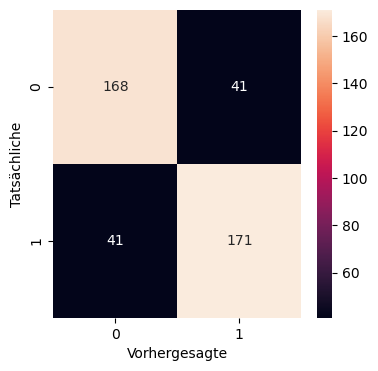

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       209
           1       0.81      0.81      0.81       212

    accuracy                           0.81       421
   macro avg       0.81      0.81      0.81       421
weighted avg       0.81      0.81      0.81       421



In [54]:

# Konfusionsmatrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Heatmap aus der Konfusionsmatrix
plt.figure(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Vorhergesagte')
plt.ylabel('Tatsächliche')

plt.show()

#Klassifikationsbericht
print('Klassifikationsbericht:')
print(classification_report(y_test, y_pred_rf))




In [55]:
# Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
true_positives = cm_rf[1][1]
false_positives = cm_rf[0][1]
false_negatives = cm_rf[1][0]

#Genauigkeit
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print('Genauigkeit:', accuracy)

#  Fehlerrate
error_rate = 1 - accuracy
print('Fehlerrate:', error_rate)

# Sensitivität
sensitivity = true_positives / (true_positives + false_negatives)
print('Sensitivität:', sensitivity)

#  Spezifität
specificity = true_negatives / (true_negatives + false_positives)
print('Spezifität:', specificity)

# Präzision
precision = true_positives / (true_positives + false_positives)
print('Präzision:', precision)


Genauigkeit: 0.8079625292740047
Fehlerrate: 0.1920374707259953
Sensitivität: 0.8066037735849056
Spezifität: 0.8093023255813954
Präzision: 0.8066037735849056


# Optimierung des Random Forests mit GridSearchCV

Der Random Forest ist ein maschinelles Lernverfahren, das zur Vorhersage von binären oder mehrklassigen Ergebnissen verwendet wird. Es besteht aus einer Vielzahl von Entscheidungsbäumen, die auf verschiedenen Teilmengen der Daten trainiert werden. Es gibt verschiedene Parameter, die in einem Random Forest eingestellt werden können, wie z.B. `n_estimators` (Anzahl der Bäume im Wald), `max_features` (Anzahl der Merkmale, die bei der Suche nach dem besten Split berücksichtigt werden), `max_depth` (maximale Tiefe der Bäume), `min_samples_split` (minimale Anzahl von Stichproben, die erforderlich sind, um einen internen Knoten zu teilen) und `min_samples_leaf` (minimale Anzahl von Stichproben, die erforderlich sind, um einen Blattknoten zu sein).

**GridSearchCV** aus der `sklearn.model_selection` Bibliothek bietet eine systematische Weise, um die besten Parameter für ein Modell zu finden. Es tut dies, indem es ein "Gitter" von Parametern erstellt und dann das Modell mit jeder Kombination von Parametern trainiert, um die beste Kombination zu finden.

Zusätzlich zu GridSearchCV kann auch **RandomizedSearchCV** aus der `sklearn.model_selection` Bibliothek verwendet werden. Während GridSearchCV alle möglichen Parameterkombinationen durchläuft, wählt RandomizedSearchCV eine festgelegte Anzahl von Parameterkombinationen zufällig aus. Dies kann bei der Optimierung von Modellen hilfreich sein, insbesondere wenn die Anzahl der Parameter und/oder die Datensatzgröße groß ist, da RandomizedSearchCV in der Regel schneller ist.
Beide Methoden, GridSearchCV und RandomizedSearchCV, können effektiv verwendet werden, um die besten Parameter für den Random Forest zu finden und die Vorhersagegenauigkeit zu verbessern.

In [56]:
# Definieren Parameterwerte, die getestet werden sollen
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)
# Grid-Suche durch
grid_search.fit(X_train, y_train)
# beste Parameter
print("Beste Parameter: ", grid_search.best_params_)
# bester Score
print("Bester Score: ", grid_search.best_score_)

Beste Parameter:  {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Bester Score:  0.8334959319087197


In [57]:
# Trainiere das Modell mit den besten gefundenen Parametern

In [58]:

# Instanz  RandomForestClassifier
rf_best = RandomForestClassifier(random_state=42)

# Setze die besten Parameter
rf_best.set_params(
    class_weight=None, 
    max_depth=None, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    n_estimators=200
)

# Trainiere Modell mit Trainingsdaten
rf_best.fit(X_train, y_train)

#Vorhersagen auf den Testdaten
y_pred_rf_best = rf_best.predict(X_test)


In [59]:
## Ergebnisse für R_F HP TUNING

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

# Berechnung der Confusion Matrix
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print('Confusion Matrix:')
print(conf_matrix_rf_best)

# Berechnung des Klassifikationsberichts
class_report = classification_report(y_test, y_pred_rf_best)
print('\nClassification Report:')
print(class_report)


Confusion Matrix:
[[168  41]
 [ 37 175]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       209
           1       0.81      0.83      0.82       212

    accuracy                           0.81       421
   macro avg       0.81      0.81      0.81       421
weighted avg       0.81      0.81      0.81       421



In [61]:
## Ergebnisse RF HP TUN

In [62]:
# Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
true_positives = conf_matrix_rf_best[1][1]
false_positives = conf_matrix_rf_best[0][1]
false_negatives = conf_matrix_rf_best[1][0]

#  Genauigkeit
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print('Genauigkeit:', accuracy)

#  Fehlerrate
error_rate = 1 - accuracy
print('Fehlerrate:', error_rate)

# Sensitivität
sensitivity = true_positives / (true_positives + false_negatives)
print('Sensitivität:', sensitivity)

#  Spezifität
specificity = true_negatives / (true_negatives + false_positives)
print('Spezifität:', specificity)

#  Präzision
precision = true_positives / (true_positives + false_positives)
print('Präzision:', precision)

# Ergebnisse ohne Tuning

# Genauigkeit: 0.7659574468085106
# Fehlerrate: 0.23404255319148937
# Sensitivität: 0.9047619047619048
# Spezifität: 0.5210084033613446
# Präzision: 0.7692307692307693

# Das Tuning hat was gebracht



Genauigkeit: 0.8173302107728337
Fehlerrate: 0.18266978922716626
Sensitivität: 0.8254716981132075
Spezifität: 0.8093023255813954
Präzision: 0.8101851851851852


## Übersicht aller Modelle

--- Logistische Regression ---
Konfusionsmatrix:
                Vorhergesagte 0  Vorhergesagte 1
Tatsächliche 0              174               35
Tatsächliche 1               37              175
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       209
           1       0.83      0.83      0.83       212

    accuracy                           0.83       421
   macro avg       0.83      0.83      0.83       421
weighted avg       0.83      0.83      0.83       421

Genauigkeit: 0.828978622327791
Fehlerrate: 0.17102137767220904
Sensitivität: 0.8254716981132075
Spezifität: 0.8325358851674641
Präzision: 0.8333333333333334


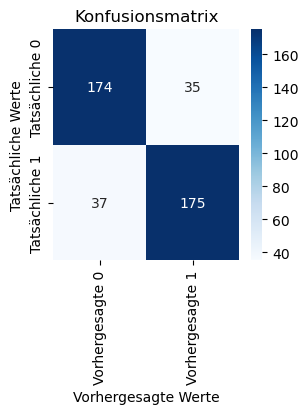

--- Entscheidungsbaum ---
Konfusionsmatrix:
                Vorhergesagte 0  Vorhergesagte 1
Tatsächliche 0              168               41
Tatsächliche 1               58              154
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       209
           1       0.79      0.73      0.76       212

    accuracy                           0.76       421
   macro avg       0.77      0.77      0.76       421
weighted avg       0.77      0.76      0.76       421

Genauigkeit: 0.7648456057007126
Fehlerrate: 0.23515439429928742
Sensitivität: 0.7264150943396226
Spezifität: 0.8038277511961722
Präzision: 0.7897435897435897


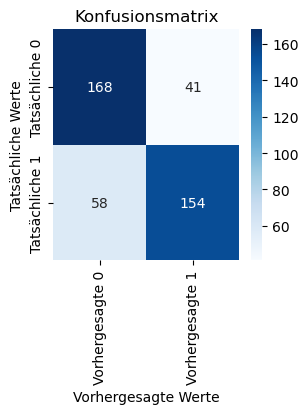

--- Random Forest ---
Konfusionsmatrix:
                Vorhergesagte 0  Vorhergesagte 1
Tatsächliche 0              168               41
Tatsächliche 1               41              171
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       209
           1       0.81      0.81      0.81       212

    accuracy                           0.81       421
   macro avg       0.81      0.81      0.81       421
weighted avg       0.81      0.81      0.81       421

Genauigkeit: 0.8052256532066508
Fehlerrate: 0.19477434679334915
Sensitivität: 0.8066037735849056
Spezifität: 0.8038277511961722
Präzision: 0.8066037735849056


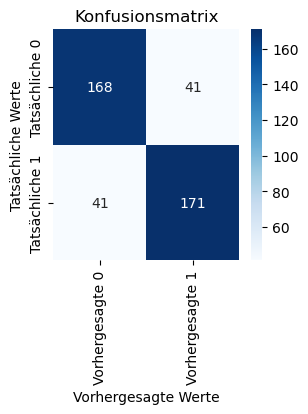

In [63]:
# Liste d Modelle Vorhersagen
models = [('Logistische Regression', y_pred_logreg), ('Entscheidungsbaum', y_pred_dt), ('Random Forest', y_pred_rf)]

for model_name, y_pred in models:
    # Konfusionsmatrix
    cm = confusion_matrix(y_test, y_pred)

    # Konfusionsmatrix in  DataFrame
    cm_df = pd.DataFrame(cm, index=['Tatsächliche 0', 'Tatsächliche 1'], columns=['Vorhergesagte 0', 'Vorhergesagte 1'])

    #  Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
    true_positives = cm[1][1]
    false_positives = cm[0][1]
    false_negatives = cm[1][0]
    true_negatives = cm[0][0]

    # Metriken
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    error_rate = 1 - accuracy
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    precision = true_positives / (true_positives + false_positives)

    # Ergebnisse
    print(f'--- {model_name} ---')
    print('Konfusionsmatrix:')
    print(cm_df)
    print('Klassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print(f'Genauigkeit: {accuracy}')
    print(f'Fehlerrate: {error_rate}')
    print(f'Sensitivität: {sensitivity}')
    print(f'Spezifität: {specificity}')
    print(f'Präzision: {precision}')

    # Visualisiere Konfusionsmatrix mit seaborn
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
    plt.title('Konfusionsmatrix')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Tatsächliche Werte')
    plt.show()


# Ergebnisse der Optimierungsmaßnahmen für alle Modelle

--- Getuntes Logistische Regression ---
Konfusionsmatrix:
                Vorhergesagte 0  Vorhergesagte 1
Tatsächliche 0              176               33
Tatsächliche 1               42              170
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       209
           1       0.84      0.80      0.82       212

    accuracy                           0.82       421
   macro avg       0.82      0.82      0.82       421
weighted avg       0.82      0.82      0.82       421

Genauigkeit: 0.8218527315914489
Fehlerrate: 0.1781472684085511
Sensitivität: 0.8018867924528302
Spezifität: 0.8421052631578947
Präzision: 0.8374384236453202


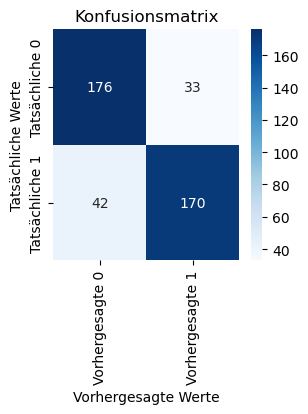

---  Getunter Entscheidungsbaum ---
Konfusionsmatrix:
                Vorhergesagte 0  Vorhergesagte 1
Tatsächliche 0              164               45
Tatsächliche 1               40              172
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       209
           1       0.79      0.81      0.80       212

    accuracy                           0.80       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.80      0.80      0.80       421

Genauigkeit: 0.7980997624703088
Fehlerrate: 0.20190023752969122
Sensitivität: 0.8113207547169812
Spezifität: 0.784688995215311
Präzision: 0.7926267281105991


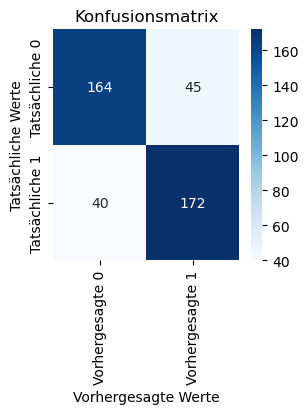

--- Getunter Random Forest ---
Konfusionsmatrix:
                Vorhergesagte 0  Vorhergesagte 1
Tatsächliche 0              168               41
Tatsächliche 1               37              175
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       209
           1       0.81      0.83      0.82       212

    accuracy                           0.81       421
   macro avg       0.81      0.81      0.81       421
weighted avg       0.81      0.81      0.81       421

Genauigkeit: 0.8147268408551069
Fehlerrate: 0.18527315914489306
Sensitivität: 0.8254716981132075
Spezifität: 0.8038277511961722
Präzision: 0.8101851851851852


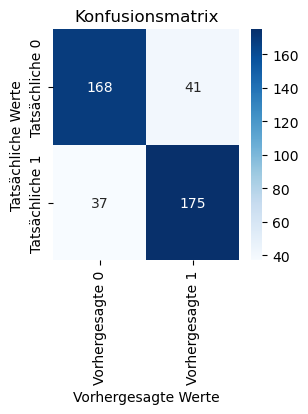

In [64]:
# Liste Modelle und ihre Vorhersagen
models = [('Getuntes Logistische Regression', y_pred_logreg_paraTU), (' Getunter Entscheidungsbaum', y_pred_dt_paraTU),
          ('Getunter Random Forest', y_pred_rf_best)]

for model_name, y_pred in models:
    # Konfusionsmatrix
    cm = confusion_matrix(y_test, y_pred)
    

    # Konfusionsmatrix in einen DataFrame
    cm_df = pd.DataFrame(cm, index=['Tatsächliche 0', 'Tatsächliche 1'], columns=['Vorhergesagte 0', 'Vorhergesagte 1'])

    # Anzahl der wahren Positiven, falschen Positiven und falschen Negativen
    true_positives = cm[1][1]
    false_positives = cm[0][1]
    false_negatives = cm[1][0]
    true_negatives = cm[0][0]

    # Metriken
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    error_rate = 1 - accuracy
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)
    precision = true_positives / (true_positives + false_positives)

    # Ergebnisse
    print(f'--- {model_name} ---')
    print('Konfusionsmatrix:')
    print(cm_df)
    print('Klassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print(f'Genauigkeit: {accuracy}')
    print(f'Fehlerrate: {error_rate}')
    print(f'Sensitivität: {sensitivity}')
    print(f'Spezifität: {specificity}')
    print(f'Präzision: {precision}')

    # Visualisieren Konfusionsmatrix mit seaborn
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
    plt.title('Konfusionsmatrix')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Tatsächliche Werte')
    plt.show()


## Einige weitere Metriken und Vergleich der aller Modelle mit Balkendiagramm


Logistic Regression:

Spezifität: 0.8325358851674641
Präzision: 0.8333333333333334
Recall: 0.8254716981132075
F1-Score: 0.8293838862559242
Genauigkeit: 0.828978622327791
ROC AUC: 0.9107158978062652
Log Loss: 0.37891457087442415

Decision Tree:

Spezifität: 0.8038277511961722
Präzision: 0.7897435897435897
Recall: 0.7264150943396226
F1-Score: 0.7567567567567568
Genauigkeit: 0.7648456057007126
ROC AUC: 0.7651214227678973
Log Loss: 8.475823481051302

Random Forest:

Spezifität: 0.8038277511961722
Präzision: 0.8066037735849056
Recall: 0.8066037735849056
F1-Score: 0.8066037735849056
Genauigkeit: 0.8052256532066508
ROC AUC: 0.9040128193554211
Log Loss: 0.47670911541077143


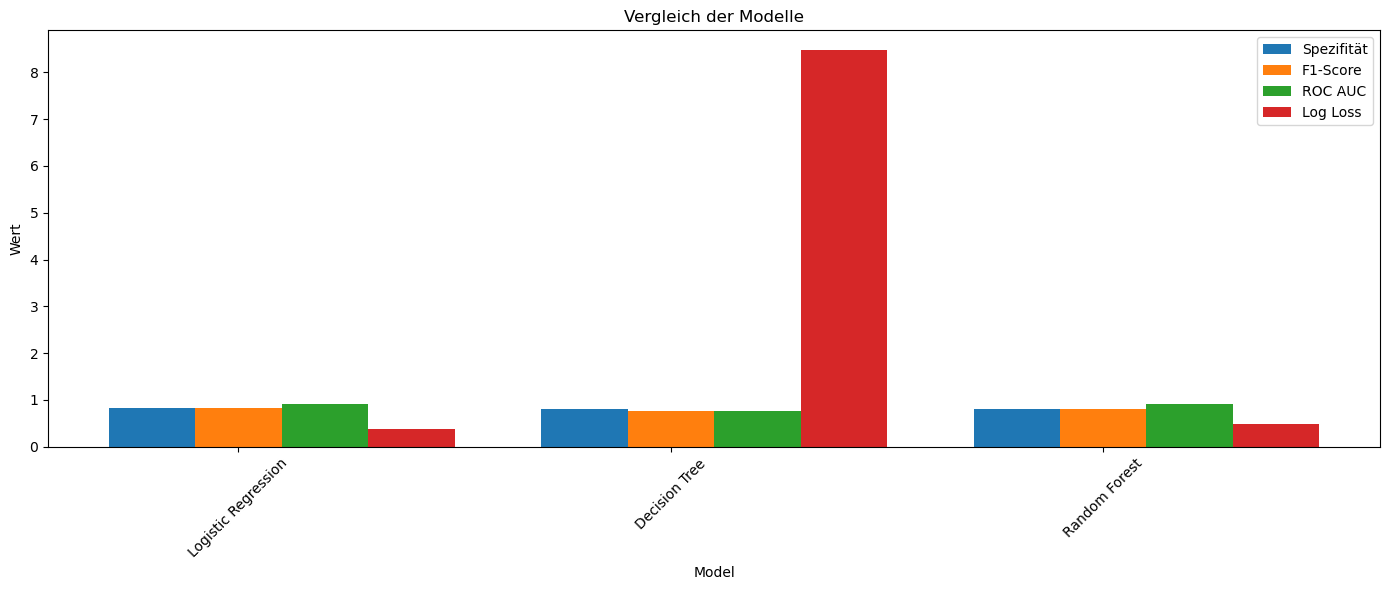

In [65]:
from sklearn.metrics import roc_auc_score, log_loss

# Liste Modelle und  Vorhersagen
models = [('Logistic Regression', log_reg), ('Decision Tree', dt_clf), ('Random Forest', rf)]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
specificities = []
f1_scores = []
roc_aucs = []
log_losses = []

# jedes Modell und berechne  Metriken
for model_name, model in models:
    print(f"\n{model_name}:\n")
    
    # Vorhersagen
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Konfusionsmatrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Spezifität
    specificity = tn / (tn+fp)
    specificities.append(specificity)
    
    print(f"Spezifität: {specificity}")
    
    # weitere Metriken
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_aucs.append(roc_auc)
    logloss = log_loss(y_test, y_pred_proba)
    log_losses.append(logloss)
    
    print(f"Präzision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"Genauigkeit: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Log Loss: {logloss}")

# Balkendiagramm zur Darstellung der Spezifität jedes Modells
plt.figure(figsize=(14, 6))
x = np.arange(len(model_names))
width = 0.2

plt.bar(x - width, specificities, width, label='Spezifität')
plt.bar(x, f1_scores, width, label='F1-Score')
plt.bar(x + width, roc_aucs, width, label='ROC AUC')
plt.bar(x + 2*width, log_losses, width, label='Log Loss')

plt.xlabel('Model')
plt.ylabel('Wert')
plt.title('Vergleich der Modelle')
plt.xticks(ticks=x, labels=model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


##  Vergleich der aller  optimierten Modelle Modelle mit Balkendiagramm 


Logistic Regression Tuned:

Spezifität: 0.8421052631578947
Präzision: 0.8374384236453202
Recall: 0.8018867924528302
F1-Score: 0.8192771084337349
Genauigkeit: 0.8218527315914489
ROC AUC: 0.9097228491468808
Log Loss: 0.4023591460174026

Decision Tree Tuned:

Spezifität: 0.784688995215311
Präzision: 0.7926267281105991
Recall: 0.8113207547169812
F1-Score: 0.8018648018648019
Genauigkeit: 0.7980997624703088
ROC AUC: 0.8624853299629864
Log Loss: 1.4685656003949112

Random Forest Tuned:

Spezifität: 0.8038277511961722
Präzision: 0.8101851851851852
Recall: 0.8254716981132075
F1-Score: 0.8177570093457944
Genauigkeit: 0.8147268408551069
ROC AUC: 0.9084815383226506
Log Loss: 0.40121845190266614


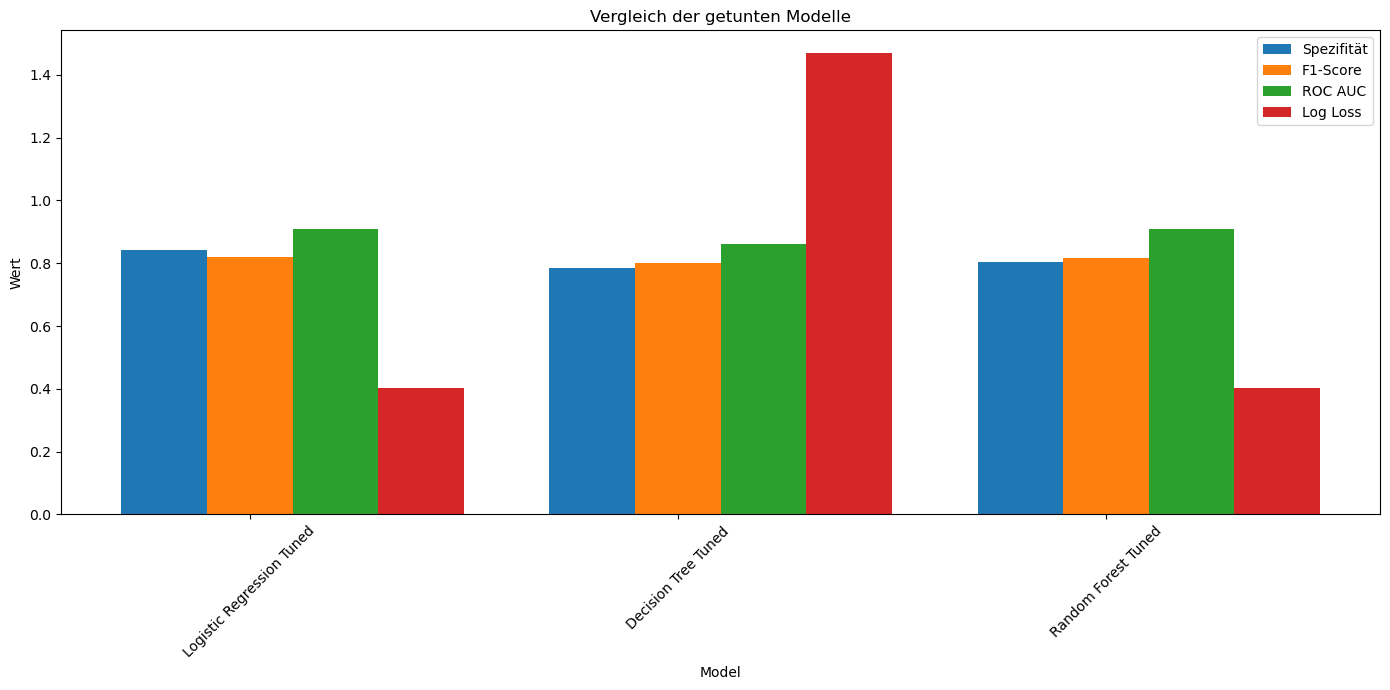

In [66]:
# Liste der Modelle und ihre Vorhersagen
models = [('Logistic Regression Tuned', log_reg_paraTU), ('Decision Tree Tuned', dt_clf_paraTU), ('Random Forest Tuned', rf_best)]
model_names = ['Logistic Regression Tuned', 'Decision Tree Tuned', 'Random Forest Tuned']
specificities = []
f1_scores = []
roc_aucs = []
log_losses = []

# Durchlaufe Modell und berechne Metriken
for model_name, model in models:
    print(f"\n{model_name}:\n")
    
    # Vorhersagen
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Konfusionsmatrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Spezifität
    specificity = tn / (tn+fp)
    specificities.append(specificity)
    
    print(f"Spezifität: {specificity}")
    
    # weitere Metriken
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_aucs.append(roc_auc)
    logloss = log_loss(y_test, y_pred_proba)
    log_losses.append(logloss)
    
    print(f"Präzision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"Genauigkeit: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Log Loss: {logloss}")

# Balkendiagramm zur Darstellung der Spezifität jedes Modells
plt.figure(figsize=(14, 7))
x = np.arange(len(model_names))
width = 0.2

plt.bar(x - width, specificities, width, label='Spezifität')
plt.bar(x, f1_scores, width, label='F1-Score')
plt.bar(x + width, roc_aucs, width, label='ROC AUC')
plt.bar(x + 2*width, log_losses, width, label='Log Loss')

plt.xlabel('Model')
plt.ylabel('Wert')
plt.title('Vergleich der getunten Modelle')
plt.xticks(ticks=x, labels=model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# Bewertung von Klassifikationsmodellen

Die folgenden Metriken sind nützlich, um die Leistung eines Klassifikationsmodells zu bewerten, das ein binäres Ergebnis vorhersagt:

- **Spezifität**: Verhältnis der korrekt vorhergesagten negativen Beobachtungen zur Gesamtzahl der tatsächlichen negativen Beobachtungen. Es wird auch als "True Negative Rate" bezeichnet.
- **Präzision**: Verhältnis der korrekt vorhergesagten positiven Beobachtungen zur Gesamtzahl der vorhergesagten positiven Beobachtungen.
- **Recall (Sensitivität)**: Verhältnis der korrekt vorhergesagten positiven Beobachtungen zur Gesamtzahl der tatsächlichen positiven Beobachtungen.
- **F1-Score**: Gewichteter Durchschnitt von Präzision und Recall. Ein F1-Score erreicht seinen besten Wert bei 1 und seinen schlechtesten Wert bei 0.
- **Genauigkeit**: Verhältnis der korrekt vorhergesagten Beobachtungen zur Gesamtzahl der Beobachtungen.
- **ROC AUC (Area Under the Receiver Operating Characteristic Curve)**: Diese Metrik gibt die Fähigkeit des Modells an, zwischen den Klassen zu unterscheiden. Ein Modell, dessen AUC-Wert 1 ist, ist ein ausgezeichnetes Modell.
- **Log Loss**: Diese Metrik wird verwendet, um die Unsicherheit von Vorhersageprognosen zu quantifizieren. Ein perfektes Modell hat einen Log Loss von 0.

Es ist wichtig zu beachten, dass die Auswahl der Metriken von der spezifischen Anwendung und den Geschäftsanforderungen abhängt. In einigen Fällen könnte es zum Beispiel wichtiger sein, eine hohe Präzision zu erreichen, während in anderen Fällen ein hoher Recall wichtiger sein könnte. Es ist auch wichtig, die Balance zwischen den verschiedenen Metriken zu berücksichtigen. Zum Beispiel könnten Modelle, die eine sehr hohe Präzision erreichen, dies auf Kosten eines niedrigen Recall tun, und umgekehrt. Daher ist es oft nützlich, mehrere Metriken zu betrachten, um ein vollständiges Bild der Modellleistung zu erhalten.



# Vergleich der Modellleistung für die Wahl des geeignetsten Modells

Die Wahl des besten Modells hängt von den spezifischen Anforderungen und Prioritäten meines Projekts ab. Hier ist meine Bewertung der jeweils besten Modelle, basierend auf verschiedenen Metriken und Anforderungen:

- **Logistic Regression**: Dieses Modell hat fast höchste Spezifität,die höhste Genauigkeit und ROC AUC. Es hat auch den niedrigsten Log Loss, was bedeutet, dass es im Durchschnitt weniger unsicher in seinen Vorhersagen ist. Allerdings ist seine Spezifität minimal niedriger als vom optimierten Log-Reg Modell.

- **Decision Tree Tuned**: Dieses Modell hat den niedrigsten Wert für die alle Metriken, was darauf hindeutet, dass es im Allgemeinen schlechter abschneidet als die anderen Modelle. Es hat auch den höhsten Log Loss

- **Random Forest Tuned**: Dieses Modell hat eine gute Balance zwischen den verschiedenen Metriken. Es hat auch eine hohe ROC AUC, was darauf hindeutet, dass es gut darin ist, zwischen den Klassen zu unterscheiden.

#### Nach dem Vergleich der Leistungsmetriken sowohl für die optimierten als auch für die nicht optimierten Modelle, habe ich mich  für das nicht optimierte logistische Regressionsmodell entschieden. Trotz der fehlenden Optimierung erzielte dieses Modell die besten Ergebnisse in den Tests




# Auswahl der geeigneten Metrik für Kreditrisikomodellierung

Im Datensatz beträgt die mediane Kredithöhe etwa 2500 € und die mediane Laufzeit liegt bei 18 Monaten. Ohne spezifische Angaben zu den Zinsen, habe ich eine Berechnung auf der Webseite der Sparkasse Düsseldorf durchgeführt. Diese Berechnung basiert auf einem Kredit, dessen Höhe und Laufzeit den Durchschnittswerten des Datensatzes entsprechen.

Der Gesamtbetrag, der nach 18 Monaten zurückgezahlt werden müsste, beläuft sich auf 2.681,69 €. Daraus ergibt sich ein Gewinn pro Kredit von 181,69 € (2.681,69 € - 2500 €).

Bei einer falschen Vorhersage, d.h., wenn ein Kredit gewährt wird, der nicht zurückgezahlt wird, wären 14 erfolgreiche Kredite (2500 € / 181,69 €) notwendig, um den Verlust auszugleichen.

**Spezifität**: Diese Metrik ist besonders wichtig, wenn die Kosten für falsche Positive, also Fälle, in denen ein Kreditnehmer fälschlicherweise als kreditwürdig eingestuft wird, hoch sind. Wenn es entscheidend ist, solche Fälle zu vermeiden, sollte der Fokus auf der Spezifität liegen.

**Zusätzlich** zur Spezifität ist es wichtig, dass die vorhergesagten Wahrscheinlichkeiten zuverlässig sind. Daher sollte auch der **Logarithmische Verlust (Log Loss)** berücksichtigt werden, der die Unsicherheit der Vorhersagen misst.


# Kreditrisikomodell und seine Vorteile

Ein **Kreditrisikomodell** kann ein unverzichtbares Werkzeug für jede Bank sein. Es dient dazu, die Wahrscheinlichkeit vorherzusagen, dass ein Kreditnehmer seinen Kreditverpflichtungen nachkommt. Kein Modell ist perfekt und es gibt immer eine gewisse Unsicherheit in den Vorhersagen, aber die Vorteile, die es bietet, sind immens.

Erstens, für die **Kunden**. Ein gut konzipiertes Modell kann potenzielle Kreditnehmer identifizieren, die von der Bank übersehen wurden. Dies könnte Menschen mit guter Bonität sein, die aufgrund traditioneller Bewertungsmethoden abgelehnt wurden. Indem wir diesen Menschen Zugang zu Krediten ermöglichen, helfen wir ihnen, ihre finanziellen Ziele zu erreichen und gleichzeitig das Kreditportfolio der Bank zu diversifizieren.

Zweitens, für die **Bank**. Ein Kreditrisikomodell kann die Bearbeitungszeit für Kreditanträge erheblich verkürzen. Durch die Automatisierung des Risikobewertungsprozesses können wir schneller auf die Bedürfnisse unserer Kunden reagieren und gleichzeitig die Arbeitsbelastung unserer Mitarbeiter reduzieren. Darüber hinaus kann das Modell dazu beitragen, finanzielle Verluste zu minimieren, indem es genaue und zeitnahe Vorhersagen über das Ausfallrisiko liefert.

Insgesamt glaube ich, dass die Einführung eines Kreditrisikomodells eine Win-Win-Situation für alle Beteiligten ist. Es ermöglicht uns, bessere Dienstleistungen für unsere Kunden zu erbringen, unsere Effizienz zu steigern und unsere finanzielle Stabilität zu sichern.


In [67]:
# Vorhersagen und Wahrscheinlichkeiten für das gesamte Dataset mit bestem Modell
y_pred_all = log_reg.predict(X)
y_pred_proba_all = log_reg.predict_proba(X)

# tatsächlichen und vorhergesagten Werte zu df_credit hinzu
df_credit['Tatsächliche Creditability'] = y
df_credit['Vorhergesagte Creditability'] = y_pred_all

# Wahrscheinlichkeiten 
df_credit['Wahrscheinlichkeit (0)'] = y_pred_proba_all[:, 0]
df_credit['Wahrscheinlichkeit (1)'] = y_pred_proba_all[:, 1]
df_credit_vorhersage = df_credit.copy()


In [68]:
df_credit_vorhersage.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Tatsächliche Creditability,Vorhergesagte Creditability,Wahrscheinlichkeit (0),Wahrscheinlichkeit (1)
0,1,No Account,18,Curr&Prev_Creds_OK,Used Car,1049,None,unemployed&Below_1Year&,Below 20%,"Male, Single",None,Above 7,Car,21,None,Free,1,Skilled,3 or More,No,1,0,0.604140,0.395860
1,1,No Account,9,Curr&Prev_Creds_OK,Other,2799,None,"[1, 4)","(25%, 35%)","Male, Married/Widowed",None,"[1, 4)",None,36,None,Free,2 or more,Skilled,Less than 3,No,1,0,0.501996,0.498004
2,1,None,12,Paid Up,Retraining,841,up_to_1000,"[4, 7)","(25%, 35%)","Male, Single",None,Above 7,None,23,None,Free,1,Unskilled Permanent Resident,3 or More,No,1,1,0.268019,0.731981
3,1,No Account,12,Curr&Prev_Creds_OK,Other,2122,None,"[1, 4)","[20%, 25%)","Male, Married/Widowed",None,"[1, 4)",None,39,None,Free,2 or more,Unskilled Permanent Resident,Less than 3,No,1,1,0.497401,0.502599
4,1,No Account,12,Curr&Prev_Creds_OK,Other,2171,None,"[1, 4)",Below 20%,"Male, Married/Widowed",None,Above 7,Car,38,Other Banks&Dept. Store,Rented,2 or more,Unskilled Permanent Resident,3 or More,No,1,1,0.336786,0.663214


# Kreditrisikomodell

Ein sorgfältig konzipiertes Modell eröffnet die Möglichkeit, potenzielle Kreditnehmer zu erkennen, die von der Bank möglicherweise übersehen wurden. Diese könnte Personen mit einer soliden Bonität umfassen, die aufgrund herkömmlicher Bewertungsmethoden abgelehnt wurden. Indem wir diesen Personen Kreditzugang gewähren, unterstützen wir sie nicht nur dabei, ihre finanziellen Ziele zu erreichen, sondern tragen auch zur Diversifizierung des Kreditportfolios der Bank bei.

## Logistisches Modell

Um diese potenziellen Kreditnehmer effizient zu identifizieren, setzen wir ein einfaches logistisches Modell ein, das auf unseren vorhandenen Datensatz angewendet wird. Nach der Durchführung des Modells wird der transformierte Datensatz sicher in einer CSV-Datei gespeichert.

## Power BI

Im nächsten Schritt nutze ich Power BI, um diese CSV-Datei zu öffnen und eine klare und effiziente Kundenfilterung durchzuführen. Power BI ist einfach zu bedienen und ermöglicht es auch den Entscheidungsträgern, die vielleicht nicht so versiert in der Programmierung sind, die Vorteile des Modells zu nutzen. Dieser Prozess hilft uns dabei, Kunden zu identifizieren, die trotz ihrer Kreditwürdigkeit übersehen wurden, oder solche, die bereits als kreditwürdig eingestuft wurden, aber einer erneuten Überprüfung bedürfen. Auf diese Weise stellen wir sicher, dass kein potenzieller Kreditnehmer übersehen wird. Dieser Ansatz stellt eine gründliche und umfassende Methode zur Kreditvergabe sicher, die sowohl für die Bank als auch für die Kreditnehmer von Vorteil ist.


In [69]:
df_credit_vorhersage.to_csv(r'C:\Users\PC\Desktop\df_credit_vorhersage.csv', index=False, decimal=',')
